<h1>NLP, Pınar Yazgan<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1--Aims" data-toc-modified-id="1--Aims-1">1- Aims</a></span></li><li><span><a href="#2--Summary" data-toc-modified-id="2--Summary-2">2- Background</a></span></li><li><span><a href="#3--Setup Environment" data-toc-modified-id="3--Setup Environment">3- Setup Environment</a></span></li>
<li><span><a href="#4--Most Common Hastags" data-toc-modified-id="4--Most Common Hastags">4 - Most Common Hastags</a></span><li><span><a href="#5- Tokenize the text of the tweets" data-toc-modified-id="5- Tokenize the text of the tweets">5 - Tokenize the text of the tweets</a></span></li><li><span><a href="#5- Tokenize the text of the tweets" data-toc-modified-id="6- Stopwords in brown corpus and Got tweets">6- Stopwords in brown corpus and Got tweets</a></span></li><li><span><a href="#-7 Wordcloud" data-toc-modified-id="7 Wordcloud">7- Wordcloud</a></span></li><li><span><a href="#-8 Term-document matrix" data-toc-modified-id="8 Term-document matrix">8-Term-document matrix</a></span></li><li><span><a href="#-9-Topic Detection" data-toc-modified-id="9--Topic Detection">9-Topic Detection</a></span></li></ul></div>

# 1 - Aims
Twitter data has recently been one of the most favorite dataset for Natural Language Processing (NLP) researchers. In this assignment analysed tweets that were collected during the airing of the 'Red Wedding' episode of Game of Thrones uing Natural Language Processing.

# 2 - Background

Natural language processing (NLP) is a branch of artificial intelligence that helps computers understand, interpret and manipulate human language. Basic NLP tasks include tokenization and parsing, lemmatization/stemming, part-of-speech tagging, language detection and identification of semantic relationships.

# 3 - Setup Environment

In [754]:
import numpy as np
import pandas as pd 
import re, string, unicodedata
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
pd.set_option('display.max_columns', None)
data = pd.read_csv('got_tweets.csv')
data.head(5)
!pip install emoji
!pip install num2words
from num2words import num2words
from nltk.tokenize import word_tokenize
!pip install --upgrade gensim
from gensim import corpora, models
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
!pip install wordcloud
from wordcloud import WordCloud
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt




[nltk_data] Downloading package wordnet to /home/fmx2hx/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/fmx2hx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [755]:
data

id      created_at  created_at_shift       from_user  \
0      3.416120e+17  6/3/2013 18:45                 0  TheMadamEditor   
1      3.416120e+17  6/3/2013 18:45                 0      nitaselimi   
2      3.416120e+17  6/3/2013 18:45                 0    dh_editorial   
3      3.416120e+17  6/3/2013 18:45                 0        theprint   
4      3.416120e+17  6/3/2013 18:45                 0      Mr_Twenty2   
...             ...             ...               ...             ...   
27330  3.416680e+17  6/3/2013 22:28                 0  RocketQueen2x5   
27331  3.416680e+17  6/3/2013 22:28                 0     Brianpmohan   
27332  3.416680e+17  6/3/2013 22:28                 0   WestJamUnited   
27333  3.416680e+17  6/3/2013 22:28                 0        PAHarper   
27334  3.416680e+17  6/3/2013 22:28                 0    ShrimpWonder   

       from_user_id  from_user_id_str       from_user_name        id_str  \
0         337689639         337689639         madam-editor  3.416120e+17   
1         421347539         421347539          Nita Selimi  3.416120e+17   
2         256671039         256671039  Dee @ EditorialEyes  3.416120e+17   
3            809334            809334     Rasmus Rasmussen  3.416120e+17   
4          69222052          69222052           Marty Caan  3.416120e+17   
...             ...               ...                  ...           ...   
27330     155242080         155242080         Funke Aleshe  3.416680e+17   
27331      51492815          51492815          Brian Mohan  3.416680e+17   
27332     334073484         334073484                Jamie  3.416680e+17   
27333     106702255         106702255          Phil Harper  3.416680e+17   
27334     365207282         365207282    boundarymembranes  3.416680e+17   

       in_reply_to_status_id  in_reply_to_status_id_str iso_language_code  \
0                        NaN                        NaN                en   
1               3.416110e+17               3.416110e+17                tl   
2                        NaN                        NaN                en   
3                        NaN                        NaN                en   
4                        NaN                        NaN                en   
...                      ...                        ...               ...   
27330                    NaN                        NaN                en   
27331                    NaN                        NaN                en   
27332                    NaN                        NaN                en   
27333                    NaN                        NaN                en   
27334                    NaN                        NaN                en   

       latitude  longitude            metadata place  \
0           NaN        NaN  result_type=recent   NaN   
1           NaN        NaN  result_type=recent   NaN   
2           NaN        NaN  result_type=recent   NaN   
3           NaN        NaN  result_type=recent   NaN   
4           NaN        NaN  result_type=recent   NaN   
...         ...        ...                 ...   ...   
27330       NaN        NaN  result_type=recent   NaN   
27331       NaN        NaN  result_type=recent   NaN   
27332       NaN        NaN  result_type=recent   NaN   
27333       NaN        NaN  result_type=recent   NaN   
27334       NaN        NaN  result_type=recent   NaN   

                                       profile_image_url  \
0      http://a0.twimg.com/profile_images/1448601184/...   
1      http://a0.twimg.com/profile_images/3570330661/...   
2      http://a0.twimg.com/profile_images/1252656506/...   
3      http://a0.twimg.com/profile_images/1469678734/...   
4      http://a0.twimg.com/profile_images/1492961144/...   
...                                                  ...   
27330  http://a0.twimg.com/profile_images/3653474295/...   
27331  http://a0.twimg.com/profile_images/3442035606/...   
27332  http://a0.twimg.com/profile_images/3741402554/...   
27333  http://a0.twimg.com/pr

## 4 - Most Common Hastags
Parsed all the hashtags out of the texts, then counted their overall occurrences and found 10 most common hashtags. Made a bar chart of these top 10 hashtags.

Firstly using Regex (Regular Expressions) selected hastags and assigned to data[hashtag] column
Calculated the length of the list / number of entries! (! This is with duplicate entries)
Transformed the list of hastags into a dataframe
Renamed the columns of the dataframe, initialized punctuations string.
Calculated the number of time a hashtag appear in the tweets.
Ordered the dataframe with the highest number of words at the top. 
Droped the duplicates of the words.Showed only the top ten first word in bar chart.


In [756]:
# Firstly using Regex (Regular Expressions) selected hastags and assigned to data[hashtag] column
data['hashtag'] = data['text'].apply(lambda x: re.findall(r"(#\S+)", x.lower()))
data.head(5)
hashtags = []

for sublist in data.hashtag:
    for word in sublist:
        hashtags.append(word)

In [757]:
#hashtags

In [758]:
# Calculate the length of the list / number of entries! (! This is with duplicate entries)
nb_hashtags = len(hashtags)
print("Total number of hashtags is " + str(nb_hashtags) + ".")

Total number of hashtags is 27724.


In [759]:
# Transform the list of hastags into a dataframe
hashtags_df = pd.DataFrame(hashtags)
# Rename the columns of the dataframe
hashtags_df.columns = ['hashtags']

In [760]:
## initializing punctuations string 
hashtags_df['hashtags'] = hashtags_df.hashtags.str.replace('[^\w\s]','')


/home/fmx2hx/.conda/envs/conda/lib/python3.7/site-packages/ipykernel/__main__.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app


In [761]:
# Calculate the number of time a hashtag appear in the tweets
hashtags_df['count'] = hashtags_df.groupby('hashtags')['hashtags'].transform('count')

In [762]:
hashtags_df['count']

0        15299
1        15299
2        15299
3            2
4        15299
         ...  
27719        1
27720        1
27721       10
27722     2185
27723      143
Name: count, Length: 27724, dtype: int64

In [763]:
# Order the dataframe with the highest number of words at the top. 
hashtags_df = hashtags_df.sort_values(by=['count'], ascending=False)
# Drop the duplicates of the words! Show only the top ten first word!
hashtags_df = hashtags_df.drop_duplicates(['hashtags'], keep='first')

In [764]:
hashtags_df[:10]

hashtags  count
0            gameofthrones  15299
6516            redwedding   4245
20831                  got   2185
17840  therainsofcastamere    320
18362     rainsofcastamere    166
2376               getglue    143
23869                  wtf    104
764          theredwedding     74
11663                  hbo     70
8933             robbstark     66

Text(0, 0.5, 'count of hashtags')

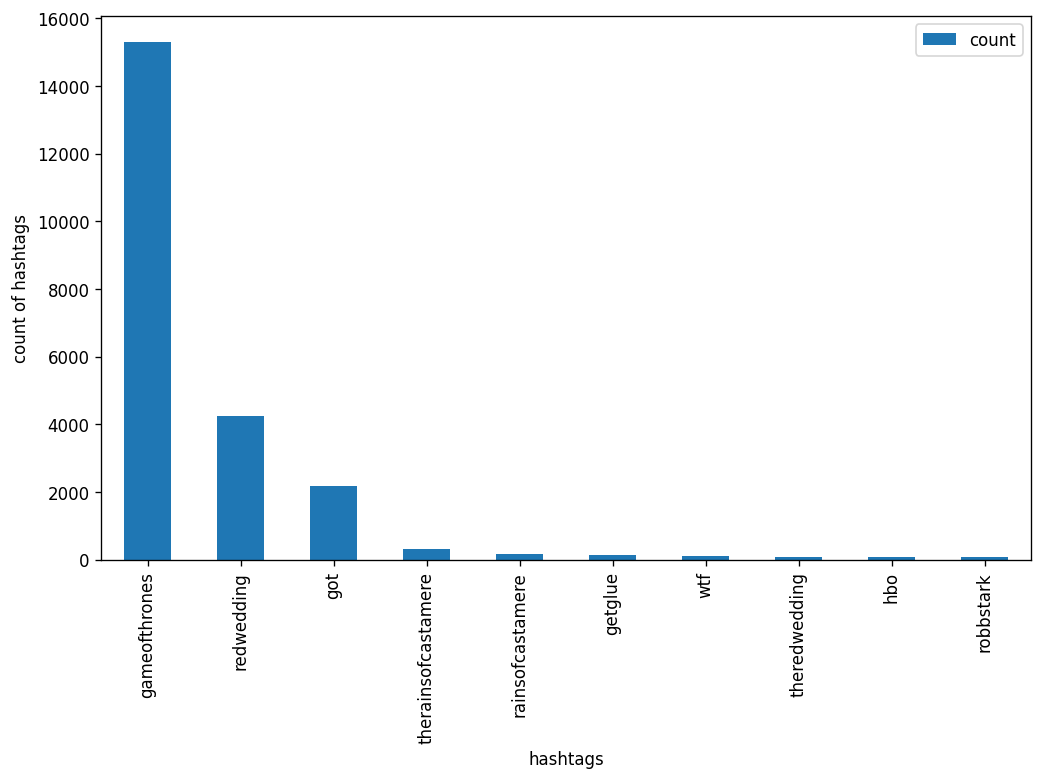

In [765]:
ax=hashtags_df[:10].plot.bar(x='hashtags', y='count', rot=90)
ax.set_ylabel('count of hashtags')

In [766]:
noduplicate_hashtags = len(hashtags_df)
print("Total number of single hashtags is " + str(noduplicate_hashtags) + ".")

Total number of single hashtags is 2569.


# 5 - Tokenize the text of the tweets


Tokenize the text of the tweets, and gather the 'real' words for each tweet.

By 'real' words, there should be:
* no punctuations
* hashtags only without `#` mark
* no user mentions
* no URLs
* no emojis
* no numbers

Count word occurrences, make a histogram of the occurrences. What are the top words? Are they what you expected?

What crazy words did you get? Explain possible approaches, with which you could throw out this kind of junk text as well.

Firstly removed emojis. Then removed url and mentions using preprocessor library.
removed punctiation.
tokenized words and converted lowercase
removed stopwords and numeric characters.
Took all the tokens (separated words) and append them in a list
I have a giant list of all words that have been writen in the tweets
Calculated the length of the list / number of entries!
Turned the list into a dataframe 
Calculated the number of time a word appear in the tweets 
Order the dataframe with the highest number of words at the top. 
Add the frequency of occurance of the words!
Drop the duplicates of the words! Show only the top ten first word!
Top ten words are 'game',
 'thrones',
 'episode',
 'last',
 'im',
 'de',
 'fuck',
 'wedding',
 'watching',
 'still'
 I think that they are very related to game of thrones as I expected. 

In [767]:
#!pip install emoji
#Encodes all the data into ASCII values #and ignore if the data can not be encoded. 
#After encoding it tries to decode them all again
#because all the emojis were ignored in the encoding process. 
#So now we have all the data without emojis.
#import emoji
data = data.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
STOP_WORDS = stopwords.words('english')



In [768]:
import preprocessor as p #Adding the cleaned (After removal of URLs, Mentions) tweets to a new column as a new feature ‘text

def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    return text
data['textclean'] = data.apply(preprocess_tweet, axis=1)

data['textclean']
#After removal of URLs, Mentions

0                         About to watch and I am tweaked.
1        gjith e kom dasht, veq ti je tu ma shti nqef e...
2        Are there, like, House Stark/Tony Stark mashup...
3        Reading reactions after last night's episode i...
4        I don't know if I'm impressed or disgusted! Br...
                               ...                        
27330    mins after the episode has finished, Game of T...
27331    Actually fuming with game of thrones ha how sa...
27332    : It's entirely possible that Twitter just wat...
27333    : It's entirely possible that Twitter just wat...
27334    : It's entirely possible that Twitter just wat...
Name: textclean, Length: 27335, dtype: object

In [769]:
def remove_punct(text): #remove punctiation
    text_nopunct = ''.join([char for char in text if char not in string.punctuation])
    return text_nopunct
data['textcleanpunct'] = data['textclean'].apply(lambda x: remove_punct(x))
# this is how you can drop any column. --> train_data.drop('text_clean', axis=1, inplace=True)
data['textcleanpunct']

0                          About to watch and I am tweaked
1        gjith e kom dasht veq ti je tu ma shti nqef ed...
2        Are there like House StarkTony Stark mashups o...
3        Reading reactions after last nights episode is...
4        I dont know if Im impressed or disgusted Brill...
                               ...                        
27330    mins after the episode has finished Game of Th...
27331    Actually fuming with game of thrones ha how sa...
27332     Its entirely possible that Twitter just watch...
27333     Its entirely possible that Twitter just watch...
27334     Its entirely possible that Twitter just watch...
Name: textcleanpunct, Length: 27335, dtype: object

In [770]:
#function to tokenize words 
def tokenize(text):
    tokens = re.split('\W+',text) #W+ means that either a word character (A-Z) or a dash(-) can go there.
    return tokens

#converting to lowercase as python is case-sensitive
data['textlower'] = data['textcleanpunct'].apply(lambda x: tokenize(x.lower()))
data['textlower']

0                  [about, to, watch, and, i, am, tweaked]
1        [gjith, e, kom, dasht, veq, ti, je, tu, ma, sh...
2        [are, there, like, house, starktony, stark, ma...
3        [reading, reactions, after, last, nights, epis...
4        [i, dont, know, if, im, impressed, or, disgust...
                               ...                        
27330    [mins, after, the, episode, has, finished, gam...
27331    [actually, fuming, with, game, of, thrones, ha...
27332    [, its, entirely, possible, that, twitter, jus...
27333    [, its, entirely, possible, that, twitter, jus...
27334    [, its, entirely, possible, that, twitter, jus...
Name: textlower, Length: 27335, dtype: object

In [771]:
stopword = nltk.corpus.stopwords.words('english') #all english stopwords 
#function to remove stopwords and numeric characters and return length of word >1
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword and word.isalpha() and len(word)>1]
    return text

data['removewtopwords'] = data['textlower'].apply(lambda x: remove_stopwords(x))
data['removewtopwords']

0                                         [watch, tweaked]
1        [gjith, kom, dasht, veq, ti, je, tu, shti, nqe...
2                 [like, house, starktony, stark, mashups]
3        [reading, reactions, last, nights, episode, hi...
4        [dont, know, im, impressed, disgusted, brillia...
                               ...                        
27330    [mins, episode, finished, game, thrones, taken...
27331     [actually, fuming, game, thrones, ha, sad, must]
27332    [entirely, possible, twitter, watched, game, t...
27333    [entirely, possible, twitter, watched, game, t...
27334    [entirely, possible, twitter, watched, game, t...
Name: removewtopwords, Length: 27335, dtype: object

In [772]:
# Take all the tokens (separated words) and append them in a list
# I have a giant list of all words that have been writen in the tweets

tokens = []

for sublist in data.removewtopwords:
    for word in sublist:
        tokens.append(word)

In [773]:
# Calculate the length of the list / number of entries!
nb_tokens = len(tokens)
print("The total number of words for all the tweets is " + str(nb_tokens) + ".")

The total number of words for all the tweets is 180459.


In [774]:
# Turn the list into a dataframe -> easier to deal with!
tokens_df = pd.DataFrame(tokens)
tokens_df.columns = ['words']

In [775]:
# Calculate the number of time a word appear in the tweets 
tokens_df['count'] = tokens_df.groupby('words')['words'].transform('count')

In [776]:
# Order the dataframe with the highest number of words at the top. 
tokens_df = tokens_df.sort_values(by=['count'], ascending=False)
# Drop the duplicates of the words! Show only the top ten first word!
tokens_df = tokens_df.drop_duplicates(['words'], keep='first')

In [777]:
#for ' ' values
tokens_df.columns = tokens_df.columns.str.replace(' ', '')
tokens_df.dropna(inplace=True)



In [778]:
index_names = tokens_df[(tokens_df['words']=='')].index
tokens_df.drop(index_names, inplace = True)

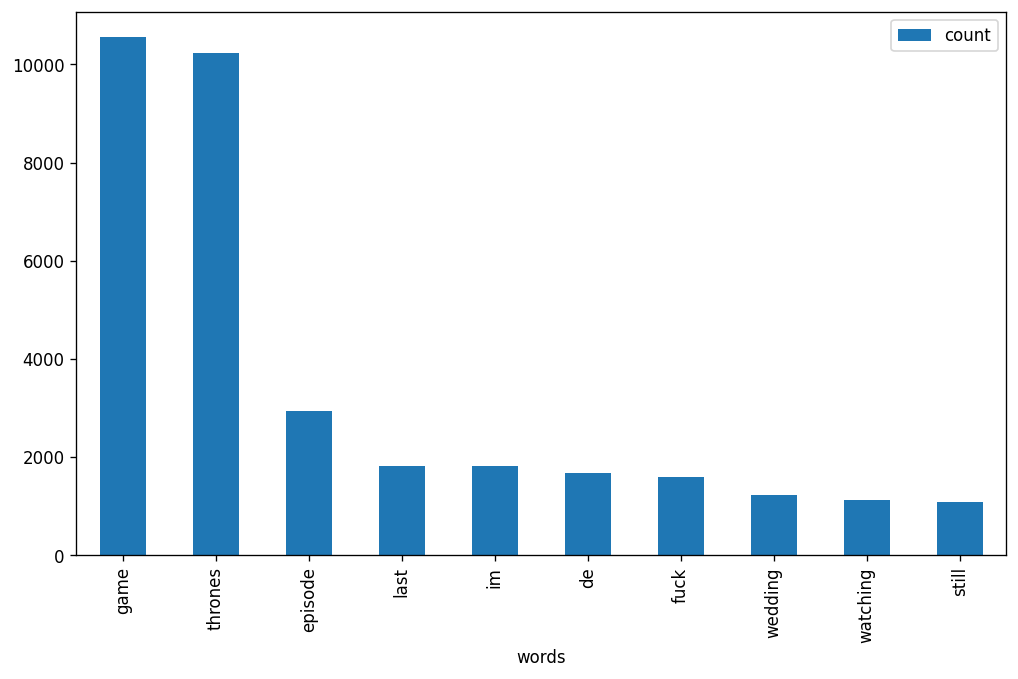

In [779]:
tokens_df[:10].plot.bar(x='words', y='count', rot=90);

In [780]:
# Add the frequency of occurance of the words!
tokens_df['frequency_totwords'] = (tokens_df['count']/nb_tokens)*100
tokens_df[:10]
tokens_df[:10]['words'].tolist()

['game',
 'thrones',
 'episode',
 'last',
 'im',
 'de',
 'fuck',
 'wedding',
 'watching',
 'still']

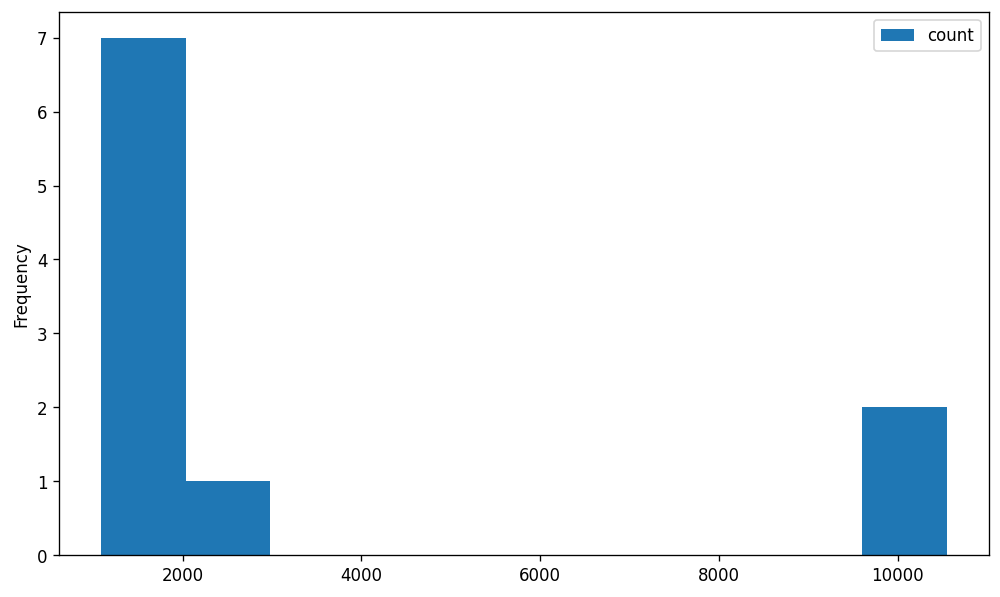

In [781]:
tokens_df[:10].plot.hist(x='words', y='count');

In [782]:
#tokens

# 6- Stopwords in brown corpus and Got tweets




Extract the stopword list for the English language with the help of `nltk`. Download the standard Brown Corpus also from `nltk`, count the relative frequency of stopwords in both the Brown Corpus and the GoT tweets. Make a scatterplot of your results, try to explain possible similarities and deviations. What is the correlation in the stopword frequencies of the two datasets?

Firstly I downloaded brown corpus then I found stopwords in brown dataset for words column. Then I added to the list.
Calculated the length of the list
Calculate the number of time a word appear.
Ordered the dataframe with the highest number of words at the top. 
Droped the duplicates of the words! Showed only the top ten first words.
Then I counted frequency of stopwords in brown corpus.
And made a scatterplot that includes  frequency of stopwords in brown corpus.
Then I followed the same steps for got tweets.
brown corpus top10 stop words: 'the', 'of', 'and', 'to', 'a', 'in', 'that', 'is', 'was', 'for'
got tweets top10 stop words: 'of', 'the', 'i', 'to', 'a', 'that', 'in', 'just', 'was', 'what'



In [783]:
nltk.download('brown')

[nltk_data] Downloading package brown to /home/fmx2hx/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [784]:
from nltk.corpus import brown
#brown=brown.words()

In [785]:
brown=list(brown.words())

In [786]:
#brown

In [787]:
###brown stop word

In [788]:
stopwordbrown= nltk.corpus.stopwords.words('english') #all english stopwords
browntext = [word for word in brown if word in stopwordbrown]#to return all stopwords

In [789]:
#browntext

In [790]:
# Calculate the length of the list / number of entries!
nb_brown = len(browntext)
print("The total number of brown for all the tweets is " + str(nb_brown) + ".")

# Turn the list into a dataframe


The total number of brown for all the tweets is 433691.


In [791]:
browntext_df = pd.DataFrame(browntext)
browntext_df.columns = ['stops']

In [792]:
# Calculate the number of time a word appear.
browntext_df['count'] = browntext_df.groupby('stops')['stops'].transform('count')

In [793]:
# Order the dataframe with the highest number of words at the top. 
browntext_df = browntext_df.sort_values(by=['count'], ascending=False)
# Drop the duplicates of the words! Show only the top ten first world!
browntext_df = browntext_df.drop_duplicates(['stops'], keep='first')
browntext_df

stops  count
273885     the  62713
299084      of  36080
392304     and  27915
245352      to  25732
272852       a  21881
...        ...    ...
70296   shan't      1
359824       y      1
58046      don      1
202333       o      1
281298      re      1

[155 rows x 2 columns]

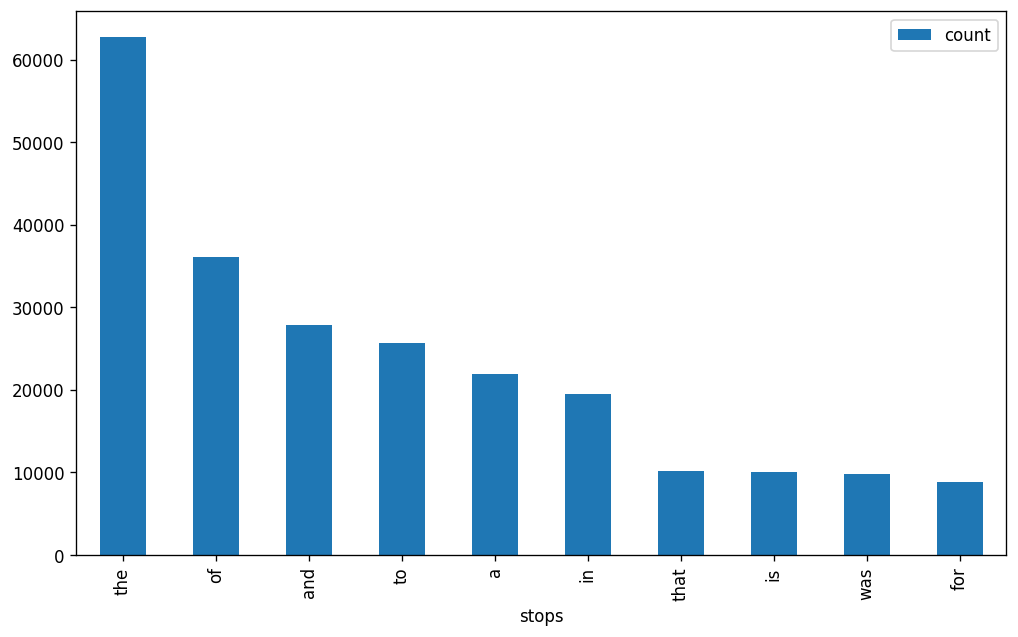

In [794]:
browntext_df[:10].plot.bar(x='stops', y='count', rot=90);


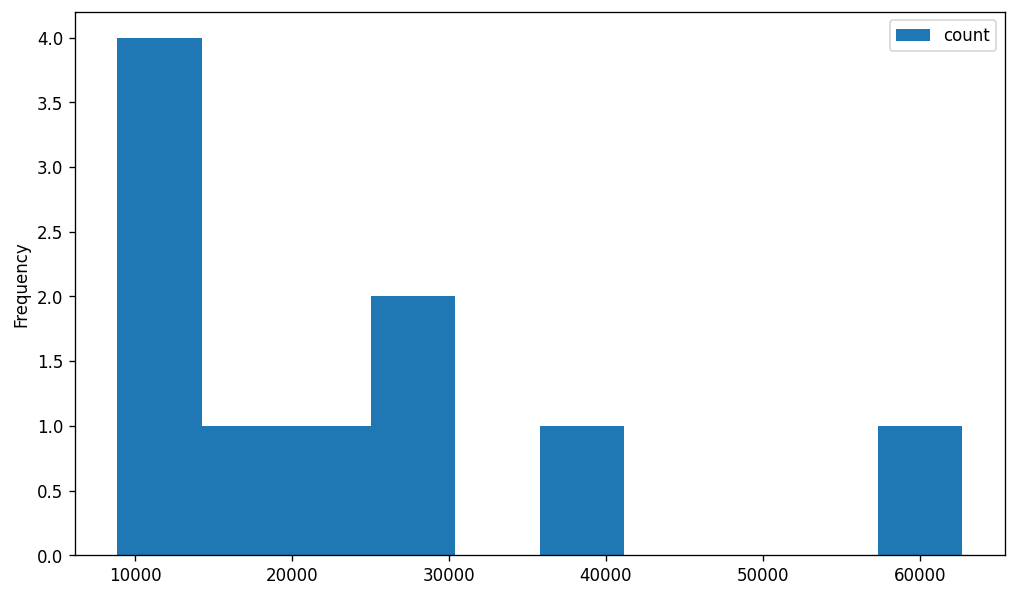

In [795]:
# Add the frequency of occurance of the words!
browntext_df['frequency_stopwords'] = (browntext_df['count']/nb_tokens)*100
browntext_df[:10]
browntext_df[:10].plot.hist(x='stops', y='count');

In [796]:
brownstop_dftop10=browntext_df[:10]  

In [797]:
brownstop_dftop10['stops'].tolist()

['the', 'of', 'and', 'to', 'a', 'in', 'that', 'is', 'was', 'for']

In [798]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='stops', ylabel='frequency_stopwords'>

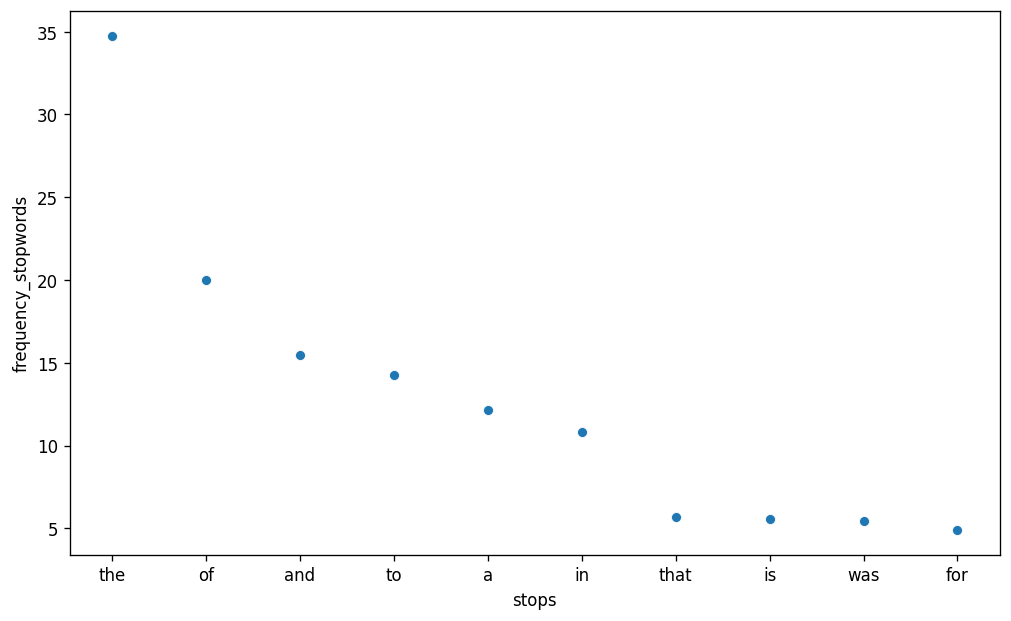

In [799]:
sns.scatterplot(data=brownstop_dftop10, x="stops", y="frequency_stopwords")

In [800]:
#for got dataset

In [801]:
stopwordgot= nltk.corpus.stopwords.words('english') #all english stopwords
def find_stopwords(stop_list):
    text = [word for word in stop_list if word in stopwordgot]#to return all stopwords
    return text
data['stopwordsall'] = data['textlower'].apply(lambda x: find_stopwords(x))

In [802]:
gotstopword=data['stopwordsall'].values.tolist()

In [803]:
#gotstopword

In [804]:
gotstop = []

for sublist in gotstopword:
    for word in sublist:
        gotstop.append(word)

In [805]:
# Calculate the length of the list / number of entries!
nb_stops = len(gotstop)
print("The total number of words for all the tweets is " + str(nb_stops) + ".")

# Turn the list into a dataframe -> easier to deal with!
gotstop_df = pd.DataFrame(gotstop)
gotstop_df.columns = ['gotstopwords']




The total number of words for all the tweets is 117982.


In [806]:
gotstop_df

gotstopwords
0             about
1                to
2               and
3                 i
4                am
...             ...
117977         just
117978           of
117979          and
117980           to
117981       itself

[117982 rows x 1 columns]

In [807]:
# Calculate the number of time a word appear in the tweets 
gotstop_df['count'] = gotstop_df.groupby('gotstopwords')['gotstopwords'].transform('count')

In [808]:
gotstop_df

gotstopwords  count
0             about   1191
1                to   5000
2               and   2610
3                 i   7151
4                am    514
...             ...    ...
117977         just   3122
117978           of  14494
117979          and   2610
117980           to   5000
117981       itself     30

[117982 rows x 2 columns]

In [809]:
# Order the dataframe with the highest number of words at the top. 
gotstop_df = gotstop_df.sort_values(by=['count'], ascending=False)
# Drop the duplicates of the words! Show only the top ten first world!
gotstop_df = gotstop_df.drop_duplicates(['gotstopwords'], keep='first')
gotstop_df

gotstopwords  count
63267           of  14494
62718          the  10179
81020            i   7151
53405           to   5000
72713            a   4436
...            ...    ...
81248          don      2
35298         whom      1
22006        below      1
42758         didn      1
1687          hers      1

[135 rows x 2 columns]

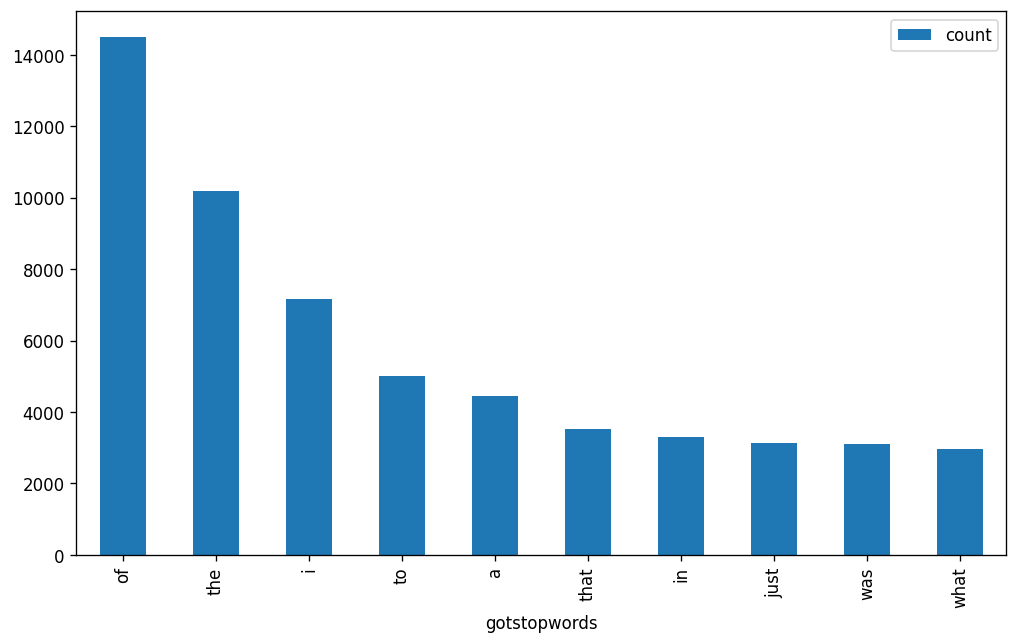

In [810]:
# Print the 10 most frequent words!
gotstop_df[:10].plot.bar(x='gotstopwords', y='count', rot=90);


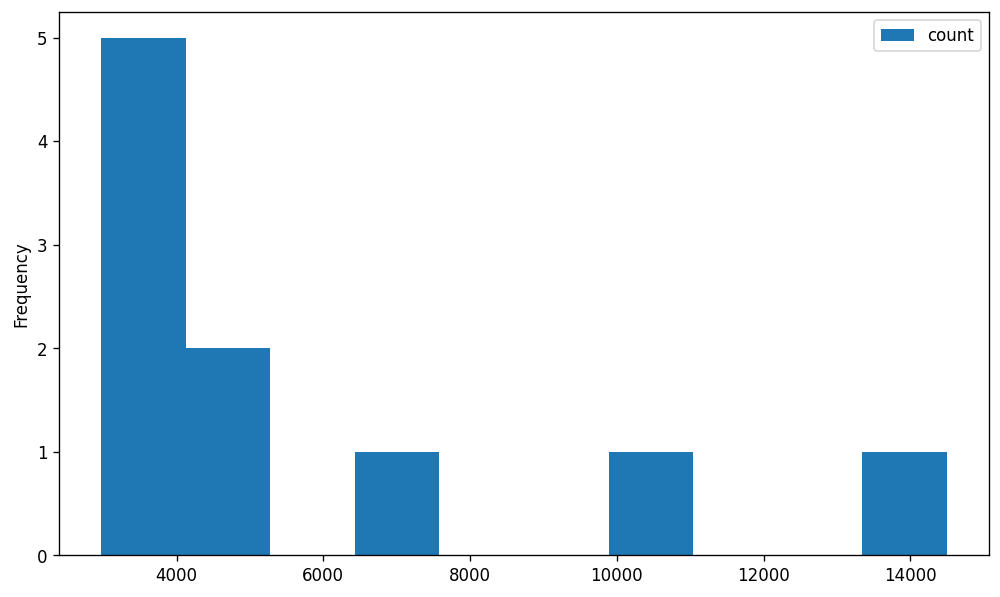

In [811]:
# Add the frequency of occurance of the words!
gotstop_df['frequency_stopwords'] = (gotstop_df['count']/nb_tokens)*100
gotstop_df[:10]
gotstop_df[:10].plot.hist(x='gotstopwords', y='count');

In [812]:
gotstop_dftop10=gotstop_df[:10]

In [813]:
gotstop_dftop10

gotstopwords  count  frequency_stopwords
63267            of  14494             8.031741
62718           the  10179             5.640616
81020             i   7151             3.962673
53405            to   5000             2.770712
72713             a   4436             2.458176
108631         that   3529             1.955569
65967            in   3311             1.834766
96452          just   3122             1.730033
12785           was   3106             1.721167
75679          what   2974             1.648020

<AxesSubplot:xlabel='gotstopwords', ylabel='frequency_stopwords'>

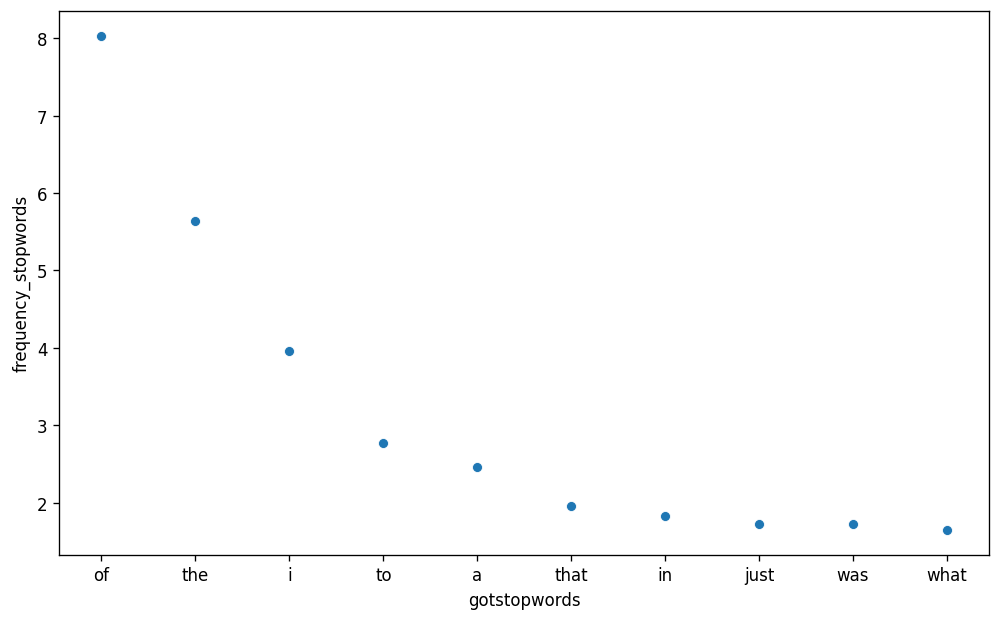

In [814]:
sns.scatterplot(data=gotstop_dftop10, x="gotstopwords", y="frequency_stopwords")

In [815]:
gotstop_dftop10  #brownstop_dftop10

gotstopwords  count  frequency_stopwords
63267            of  14494             8.031741
62718           the  10179             5.640616
81020             i   7151             3.962673
53405            to   5000             2.770712
72713             a   4436             2.458176
108631         that   3529             1.955569
65967            in   3311             1.834766
96452          just   3122             1.730033
12785           was   3106             1.721167
75679          what   2974             1.648020

In [816]:
brownstop_dftop10

stops  count  frequency_stopwords
273885   the  62713            34.751938
299084    of  36080            19.993461
392304   and  27915            15.468888
245352    to  25732            14.259195
272852     a  21881            12.125192
356434    in  19536            10.825728
268399  that  10237             5.672757
281570    is  10011             5.547520
345852   was   9777             5.417851
149061   for   8841             4.899174

In [817]:
x=gotstop_dftop10['gotstopwords']

In [818]:
x.tolist()

['of', 'the', 'i', 'to', 'a', 'that', 'in', 'just', 'was', 'what']

In [819]:
y=brownstop_dftop10['stops']

In [820]:
y.tolist()

['the', 'of', 'and', 'to', 'a', 'in', 'that', 'is', 'was', 'for']

# 7 Wordcloud

A really common tool to visualize texts is a wordcloud. Find a suitable library and create a meaningful wordcloud of the GoT tweets (e.g. leave out punctuation, stopwords etc.)

I had deleted the punctuation and stopwords above.
I rejoined meaningful stemmed words into a single string then created data['processed'].
Generated a word cloud image importing libraries WordCloud, STOPWORDS



In [821]:
data['removewtopwords'] # I had deleted the punctuation and stopwords above

0                                         [watch, tweaked]
1        [gjith, kom, dasht, veq, ti, je, tu, shti, nqe...
2                 [like, house, starktony, stark, mashups]
3        [reading, reactions, last, nights, episode, hi...
4        [dont, know, im, impressed, disgusted, brillia...
                               ...                        
27330    [mins, episode, finished, game, thrones, taken...
27331     [actually, fuming, game, thrones, ha, sad, must]
27332    [entirely, possible, twitter, watched, game, t...
27333    [entirely, possible, twitter, watched, game, t...
27334    [entirely, possible, twitter, watched, game, t...
Name: removewtopwords, Length: 27335, dtype: object

In [822]:
#I rejoined meaningful stemmed words into a single string.
def rejoin_words(data):
    my_list = data['removewtopwords']
    joined_words = ( " ".join(my_list))
    return joined_words

data['processed'] = data.apply(rejoin_words, axis=1)

In [823]:
data['processed'] 

0                                            watch tweaked
1        gjith kom dasht veq ti je tu shti nqef edhe shume
2                       like house starktony stark mashups
3        reading reactions last nights episode hilariou...
4        dont know im impressed disgusted brilliant non...
                               ...                        
27330    mins episode finished game thrones taken feeli...
27331             actually fuming game thrones ha sad must
27332    entirely possible twitter watched game thrones...
27333    entirely possible twitter watched game thrones...
27334    entirely possible twitter watched game thrones...
Name: processed, Length: 27335, dtype: object

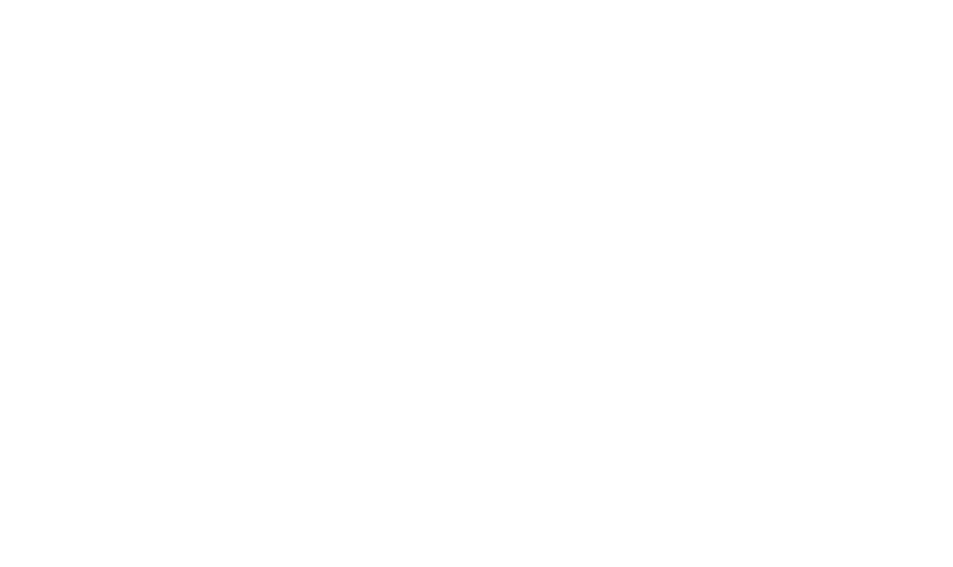

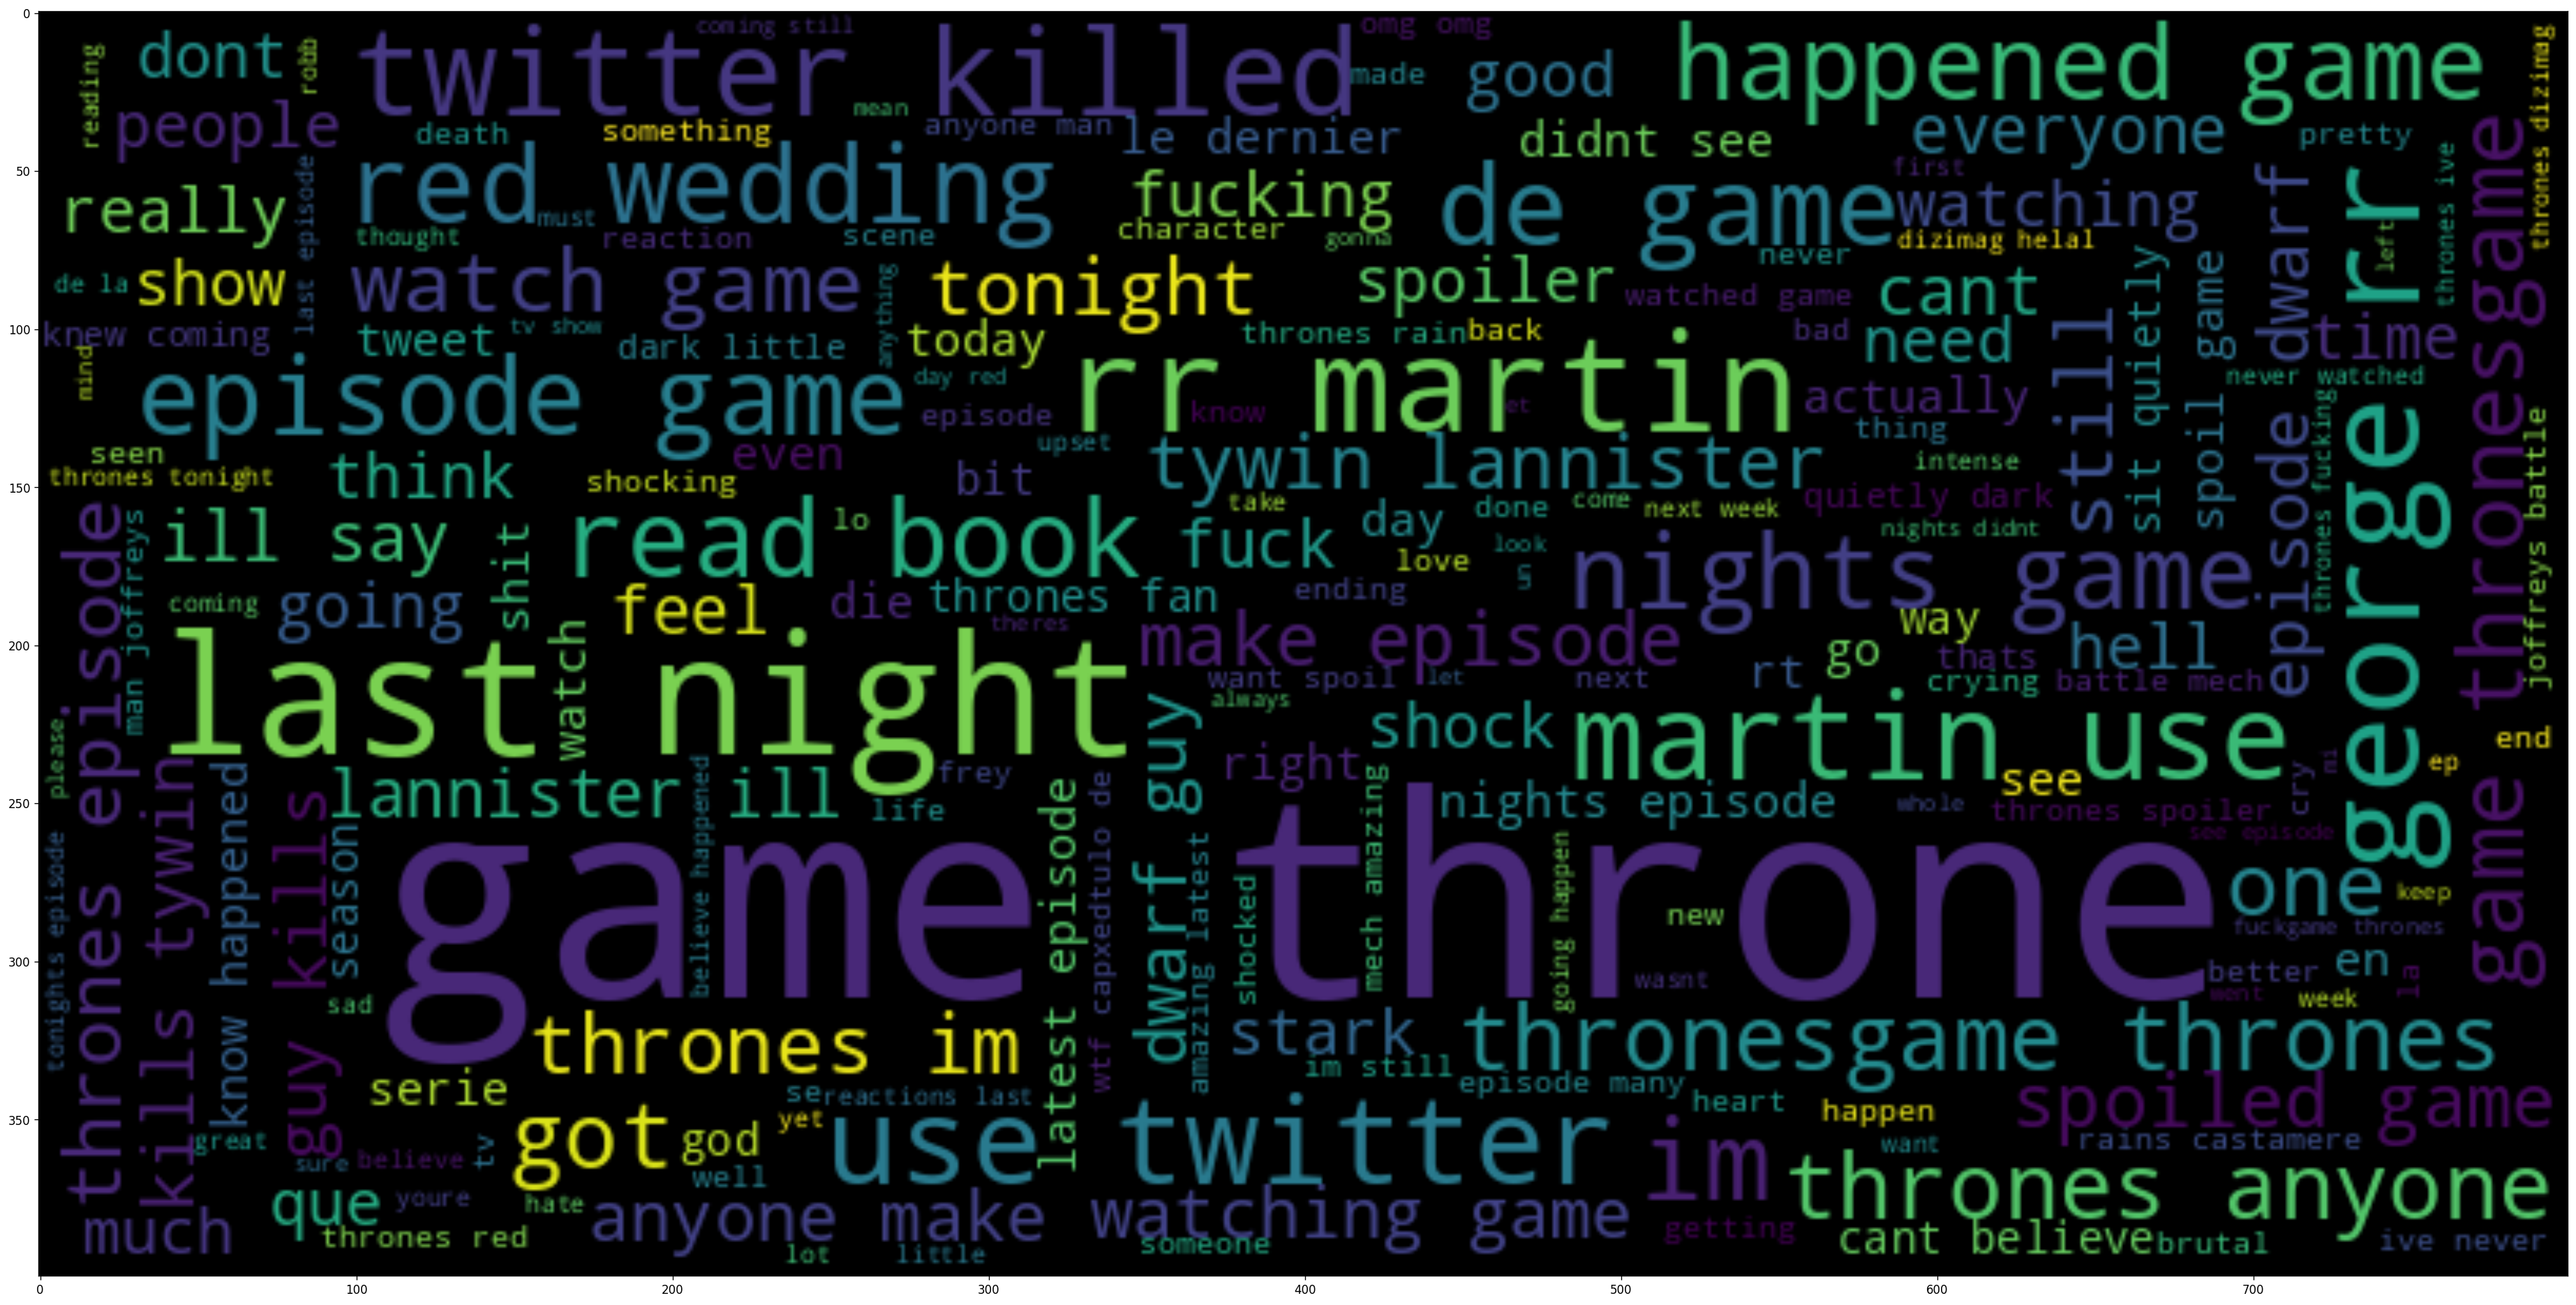

In [824]:

stopwords = set(STOPWORDS)

# Generate a word cloud image
text = "".join(word for word in data.processed)
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

# 8 Term-document matrix



Define a time window in which all tweets count as one document. Create the term-document matrix of the tweets for this time segmentation. Apply stemming and stopword filtering.

I defined time window dataset and draw graph that shows all tweets count according to time.
Then I created the term-document matrix of the tweets and applied stemming and stopword filtering.

In [825]:
# I created time window 
data2=data[['created_at','processed']]
data2['freq']=data2.groupby(by='created_at')['created_at'].transform('count')

/home/fmx2hx/.conda/envs/conda/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [826]:
data3=data2.drop('processed',axis=1).drop_duplicates()



In [827]:
data3

created_at  freq
0      6/3/2013 18:45   184
77     6/3/2013 18:44    99
115    6/3/2013 18:43   113
131    6/3/2013 18:42   116
141    6/3/2013 18:41   104
...               ...   ...
25066  6/3/2013 22:24   494
25679  6/3/2013 22:25   485
26135  6/3/2013 22:26   506
26710  6/3/2013 22:27   415
27125  6/3/2013 22:28   195

[292 rows x 2 columns]

In [828]:
data3['created_at'] = pd.to_datetime(data3['created_at'])
dataset_n = data3.set_index('created_at')
dataset_n.index

DatetimeIndex(['2013-06-03 18:45:00', '2013-06-03 18:44:00',
               '2013-06-03 18:43:00', '2013-06-03 18:42:00',
               '2013-06-03 18:41:00', '2013-06-03 18:40:00',
               '2013-06-03 18:39:00', '2013-06-03 18:38:00',
               '2013-06-03 18:37:00', '2013-06-03 18:36:00',
               ...
               '2013-06-03 22:19:00', '2013-06-03 22:20:00',
               '2013-06-03 22:21:00', '2013-06-03 22:22:00',
               '2013-06-03 22:23:00', '2013-06-03 22:24:00',
               '2013-06-03 22:25:00', '2013-06-03 22:26:00',
               '2013-06-03 22:27:00', '2013-06-03 22:28:00'],
              dtype='datetime64[ns]', name='created_at', length=292, freq=None)

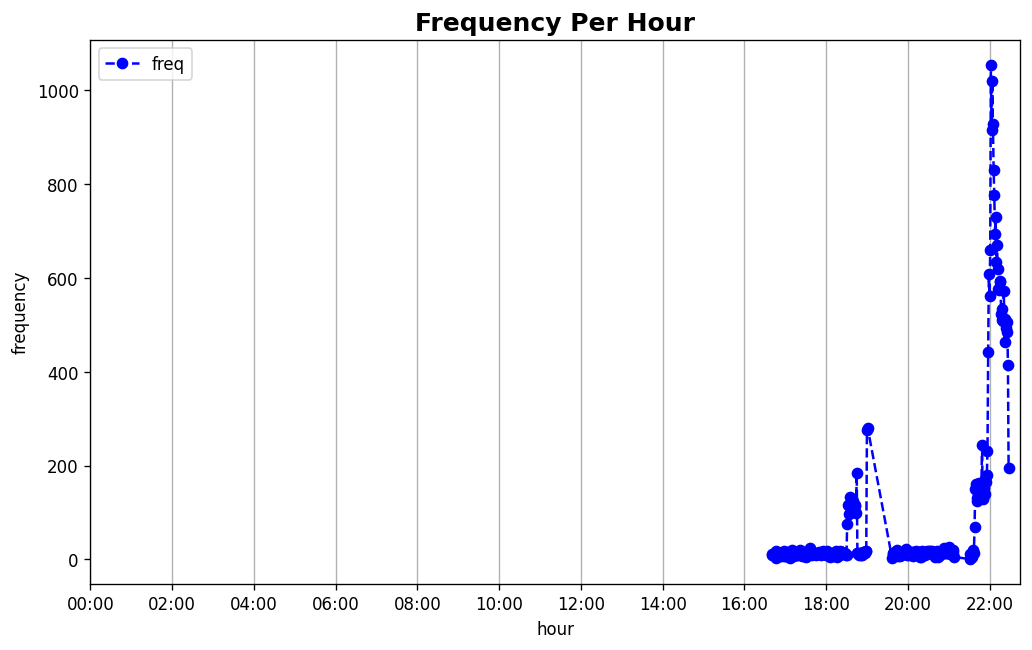

In [829]:
title_font= {"family" : "Cambria",
             "size" : 15,
             "color" : "black",
             "weight" : "bold"}

plt.rcParams.update({'figure.figsize': (10,6), 'figure.dpi': 120})

by_time = dataset_n.groupby(dataset_n.index.time).sum()
hourly_ticks = 2 * 60 * 60 *  np.arange(12)
by_time.plot(xticks=hourly_ticks, style='--o', color='blue')
plt.title('Frequency Per Hour', fontdict=title_font)
plt.xlabel('hour')
plt.ylabel('frequency')
plt.grid(axis='x')
plt.show();


I created term document matrix for tweets 

In [830]:
data['processed']

0                                            watch tweaked
1        gjith kom dasht veq ti je tu shti nqef edhe shume
2                       like house starktony stark mashups
3        reading reactions last nights episode hilariou...
4        dont know im impressed disgusted brilliant non...
                               ...                        
27330    mins episode finished game thrones taken feeli...
27331             actually fuming game thrones ha sad must
27332    entirely possible twitter watched game thrones...
27333    entirely possible twitter watched game thrones...
27334    entirely possible twitter watched game thrones...
Name: processed, Length: 27335, dtype: object

In [831]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [832]:
c = CountVectorizer()
dtf=c.fit_transform(data['processed'].head(10).tolist()).todense() #Create the term-document matrix of the tweets 


In [833]:
strfeature=' '.join(c.get_feature_names()) #It excluded so-called stopwords.

In [834]:
matrix=pd.DataFrame(dtf, columns =c.get_feature_names())

In [835]:
matrix

acabo  anything  asimilar  bolita  brilliant  capitulo  cc  dasht  de  \
0      0         0         0       0          0         0   0      0   0   
1      0         0         0       0          0         0   0      1   0   
2      0         0         0       0          0         0   0      0   0   
3      0         1         0       0          0         0   0      0   0   
4      0         0         0       0          1         0   0      0   0   
5      0         0         0       0          0         0   1      0   0   
6      1         0         1       1          0         1   0      0   2   
7      0         0         0       0          0         0   0      0   0   
8      0         0         0       0          0         0   0      0   0   
9      0         0         0       0          0         0   0      0   0   

   disgusted  dont  edhe  el  en  episode  gjith  going  happen  happened  \
0          0     0     0   0   0        0      0      0       0         0   
1          0     0     1   0   0        0      1      0       0         0   
2          0     0     0   0   0        0      0      0       0         0   
3          0     0     0   0   0        1      0      1       0         0   
4          1     1     0   0   0        0      0      0       0         0   
5          0     0     0   0   0        0      0      0       0         0   
6          0     0     0   1   1        0      0      0       0         0   
7          0     0     0   0   0        0      0      0       0         0   
8          0     0     0   0   0        0      0      0       1         0   
9          0     0     0   0   0        0      0      0       0         1   

   hell  hilarious  holy  house  im  impressed  je  know  kom  last  laughing  \
0     0          0     0      0   0          0   0     0    0     0         0   
1     0          0     0      0   0          0   1     0    1     0         0   
2     0          0     0      1   0          0   0     0    0     0         0   
3     1          1     1      0   1          0   0     0    0     1         0   
4     0          0     0      0   1          1   0     1    0     0         0   
5     0          0     0      0   0          0   0     0    0     0         1   
6     0          0     0      0   0          0   0     0    0     0         0   
7     0          0     0      0   0          0   0     0    0     0         0   
8     0          0     0      0   0          0   0     0    0     0         0   
9     0          0     0      0   0          0   0     0    0     0         0   

   like  mad  mashups  nights  nonetheless  nqef  outcome  people  que  \
0     0    0        0       0            0     0        0       0    0   
1     0    0        0       0            0     1        0       0    0   
2     1    0        1       0            0     0        0       0    0   
3     0    1        0       1            0     0        0       1    0   
4     0    0        0       0            1     0        0       0    0   
5     0    0        0       0            0     0        0       0    0   
6     0    0        0       0            0     0        0       0    1   
7     0    0        0       0            1     0        1       0    0   
8     0    0        0       0            0     0        0       0    0   
9     0    0        0       0            0     0        0       0    0   

   reactions  reading  sad  scarred  shti  shume  sigo  spoil  spoiler  stark  \
0          0        0    0        0     0      0     0      0        0      0   
1          0        0    0        0     1      1     0      0        0      0   
2          0        0    0        0     0      0     0      0        0      1   
3          1        1    0        0     0      0     0      1        0      0   
4          0        0    0        0     0      0     0      0        0      0   
5          0        0    1        0     0      0     0      0        1      0   
6          0        0    0        0     0   

In [836]:
matrix.sum(axis=1)

0     2
1    11
2     5
3    14
4     7
5     6
6    12
7     4
8     2
9     1
dtype: int64

In [837]:
#steming 
text = "".join(word for word in data.processed )
nltk.download('punkt')
porter = PorterStemmer()
from nltk.tokenize import sent_tokenize, word_tokenize
def stemSentence(text):
    token_words=word_tokenize(text)
    token_words
    stem_sentence=[]
  
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

x=stemSentence(text) # applied stemming and stopword filtering to text 
#print(x)

[nltk_data] Downloading package punkt to /home/fmx2hx/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 9- Topic Detection



Apply a TF-IDF weighting scheme for the term-document matrix by hand (e.g. do not use a built-in vectorizer, but normalize by text length with a summation etc. `numpy` or `pandas` is strongly suggested). Then, choose a topic detection method such as LSI or LDA, and run it on your matrix. Try to interpret your results! Are your topics meaningful? Which topics are the most representative of your document?

At this part I tried to apply TF-IDF weighting scheme for the term-document matrix. Then chose a LDA topic detection method.
Most highest score topic  with using TF_IDF and LDA is 

Score: 0.7666631937026978	 
Topic: 0.016*"game" + 0.016*"thrones" + 0.015*"cant" + 0.013*"im" + 0.009*"sad" + 0.009*"ending" + 0.008*"telling" + 0.008*"watching" + 0.008*"episode" + 0.008*"traumatised" + 0.008*"ive" + 0.008*"show" + 0.008*"time" + 0.007*"books" + 0.007*"read

I understand that this episode end very sadly and traumatic and many viewers dissappointed 


In [838]:

matrix.sum(axis=1)

0     2
1    11
2     5
3    14
4     7
5     6
6    12
7     4
8     2
9     1
dtype: int64

In [839]:
matrix/matrix.sum(axis=1)

acabo  anything  asimilar  bolita  brilliant  capitulo  cc  dasht  de  \
0    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   
1    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   
2    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   
3    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   
4    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   
5    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   
6    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   
7    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   
8    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   
9    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   

   disgusted  dont  edhe  el  en  episode  gjith  going  happen  happened  \
0        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   
1        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   
2        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   
3        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   
4        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   
5        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   
6        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   
7        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   
8        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   
9        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   

   hell  hilarious  holy  house  im  impressed  je  know  kom  last  laughing  \
0   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   
1   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   
2   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   
3   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   
4   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   
5   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   
6   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   
7   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   
8   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   
9   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   

   like  mad  mashups  nights  nonetheless  nqef  outcome  people  que  \
0   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   
1   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   
2   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   
3   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   
4   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   
5   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   
6   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   
7   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   
8   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   
9   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   

   reactions  reading  sad  scarred  shti  shume  sigo  spoil  spoiler  stark  \
0        NaN      NaN  NaN      NaN   NaN    NaN   NaN    NaN      NaN    NaN   
1        NaN      NaN  NaN      NaN   NaN    NaN   NaN    NaN      NaN    NaN   
2        NaN      NaN  NaN      NaN   NaN    NaN   NaN    NaN      NaN    NaN   
3        NaN      NaN  NaN      NaN   NaN    NaN   NaN    NaN      NaN    NaN   
4        NaN      NaN  NaN      NaN   NaN    NaN   NaN    NaN      NaN    NaN   
5        NaN      NaN  NaN      NaN   NaN    NaN   NaN    NaN      NaN    NaN   
6        NaN      NaN  NaN      NaN   NaN   

In [840]:
matrix.div(matrix.sum(axis=1))

acabo  anything  asimilar  bolita  brilliant  capitulo  cc  dasht  de  \
0    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   
1    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   
2    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   
3    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   
4    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   
5    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   
6    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   
7    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   
8    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   
9    NaN       NaN       NaN     NaN        NaN       NaN NaN    NaN NaN   

   disgusted  dont  edhe  el  en  episode  gjith  going  happen  happened  \
0        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   
1        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   
2        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   
3        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   
4        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   
5        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   
6        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   
7        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   
8        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   
9        NaN   NaN   NaN NaN NaN      NaN    NaN    NaN     NaN       NaN   

   hell  hilarious  holy  house  im  impressed  je  know  kom  last  laughing  \
0   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   
1   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   
2   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   
3   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   
4   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   
5   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   
6   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   
7   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   
8   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   
9   NaN        NaN   NaN    NaN NaN        NaN NaN   NaN  NaN   NaN       NaN   

   like  mad  mashups  nights  nonetheless  nqef  outcome  people  que  \
0   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   
1   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   
2   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   
3   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   
4   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   
5   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   
6   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   
7   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   
8   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   
9   NaN  NaN      NaN     NaN          NaN   NaN      NaN     NaN  NaN   

   reactions  reading  sad  scarred  shti  shume  sigo  spoil  spoiler  stark  \
0        NaN      NaN  NaN      NaN   NaN    NaN   NaN    NaN      NaN    NaN   
1        NaN      NaN  NaN      NaN   NaN    NaN   NaN    NaN      NaN    NaN   
2        NaN      NaN  NaN      NaN   NaN    NaN   NaN    NaN      NaN    NaN   
3        NaN      NaN  NaN      NaN   NaN    NaN   NaN    NaN      NaN    NaN   
4        NaN      NaN  NaN      NaN   NaN    NaN   NaN    NaN      NaN    NaN   
5        NaN      NaN  NaN      NaN   NaN    NaN   NaN    NaN      NaN    NaN   
6        NaN      NaN  NaN      NaN   NaN   

In [841]:
matrix.div(matrix.sum(axis=1), axis=0)

acabo  anything  asimilar    bolita  brilliant  capitulo        cc  \
0  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
3  0.000000  0.071429  0.000000  0.000000   0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000   0.142857  0.000000  0.000000   
5  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.166667   
6  0.083333  0.000000  0.083333  0.083333   0.000000  0.083333  0.000000   
7  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
8  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
9  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   

      dasht        de  disgusted      dont      edhe        el        en  \
0  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.090909  0.000000   0.000000  0.000000  0.090909  0.000000  0.000000   
2  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000   0.142857  0.142857  0.000000  0.000000  0.000000   
5  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
6  0.000000  0.166667   0.000000  0.000000  0.000000  0.083333  0.083333   
7  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
8  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
9  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   

    episode     gjith     going  happen  happened      hell  hilarious  \
0  0.000000  0.000000  0.000000     0.0       0.0  0.000000   0.000000   
1  0.000000  0.090909  0.000000     0.0       0.0  0.000000   0.000000   
2  0.000000  0.000000  0.000000     0.0       0.0  0.000000   0.000000   
3  0.071429  0.000000  0.071429     0.0       0.0  0.071429   0.071429   
4  0.000000  0.000000  0.000000     0.0       0.0  0.000000   0.000000   
5  0.000000  0.000000  0.000000     0.0       0.0  0.000000   0.000000   
6  0.000000  0.000000  0.000000     0.0       0.0  0.000000   0.000000   
7  0.000000  0.000000  0.000000     0.0       0.0  0.000000   0.000000   
8  0.000000  0.000000  0.000000     0.5       0.0  0.000000   0.000000   
9  0.000000  0.000000  0.000000     0.0       1.0  0.000000   0.000000   

       holy  house        im  impressed        je      know       kom  \
0  0.000000    0.0  0.000000   0.000000  0.000000  0.000000  0.000000   
1  0.000000    0.0  0.000000   0.000000  0.090909  0.000000  0.090909   
2  0.000000    0.2  0.000000   0.000000  0.000000  0.000000  0.000000   
3  0.071429    0.0  0.071429   0.000000  0.000000  0.000000  0.000000   
4  0.000000    0.0  0.142857   0.142857  0.000000  0.142857  0.000000   
5  0.000000    0.0  0.000000   0.000000  0.000000  0.000000  0.000000   
6  0.000000    0.0  0.000000   0.000000  0.000000  0.000000  0.000000   
7  0.000000    0.0  0.000000   0.000000  0.000000  0.000000  0.000000   
8  0.000000    0.0  0.000000   0.000000  0.000000  0.000000  0.000000   
9  0.000000    0.0  0.000000   0.000000  0.000000  0.000000  0.000000   

       last  laughing  like       mad  mashups    nights  nonetheless  \
0  0.000000  0.000000   0.0  0.000000      0.0  0.000000     0.000000   
1  0.000000  0.000000   0.0  0.000000      0.0  0.000000     0.000000   
2  0.000000  0.000000   0.2  0.000000      0.2  0.000000     0.000000   
3  0.071429  0.000000   0.0  0.071429      0.0  0.071429     0.000000   
4  0.000000  0.000000   0.0  0.000000      0.0  0.000000     0.142857   
5  0.000000  0.166667   0.0  0.000000      0.0  0.000000     0.000000   
6  0.000000  0.000000   0.0  0.000000      0.0  0.000000     0.000000   
7  0.000000  0.000000   0.0  0.000000      0.0  0.000000     0.250000   
8  0.000000  0.000000   0.0  0.000000      0.0  0.000000

In [842]:
matrix.div(matrix.sum(axis=1), axis=0)
matrix2=matrix.astype(bool).sum()

In [843]:
matrix.astype(bool).sum()['de']

1

In [844]:
import math
matrix.div(matrix.sum(axis=1), axis=0)
matrix2=matrix.astype(bool).mean()
matrix3=matrix2.apply(lambda x:-math.log(1/(1+x)))
matrix4=matrix.div(matrix.sum(axis=1), axis=0)

In [845]:
matrix5=matrix4.mul(matrix3,axis=1)

In [846]:
matrix5 #TF-IDF

acabo  anything  asimilar    bolita  brilliant  capitulo        cc  \
0  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
3  0.000000  0.006808  0.000000  0.000000   0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000   0.013616  0.000000  0.000000   
5  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.015885   
6  0.007943  0.000000  0.007943  0.007943   0.000000  0.007943  0.000000   
7  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
8  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
9  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   

      dasht        de  disgusted      dont      edhe        el        en  \
0  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.008665  0.000000   0.000000  0.000000  0.008665  0.000000  0.000000   
2  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000   0.013616  0.013616  0.000000  0.000000  0.000000   
5  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
6  0.000000  0.015885   0.000000  0.000000  0.000000  0.007943  0.007943   
7  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
8  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
9  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   

    episode     gjith     going    happen  happened      hell  hilarious  \
0  0.000000  0.000000  0.000000  0.000000   0.00000  0.000000   0.000000   
1  0.000000  0.008665  0.000000  0.000000   0.00000  0.000000   0.000000   
2  0.000000  0.000000  0.000000  0.000000   0.00000  0.000000   0.000000   
3  0.006808  0.000000  0.006808  0.000000   0.00000  0.006808   0.006808   
4  0.000000  0.000000  0.000000  0.000000   0.00000  0.000000   0.000000   
5  0.000000  0.000000  0.000000  0.000000   0.00000  0.000000   0.000000   
6  0.000000  0.000000  0.000000  0.000000   0.00000  0.000000   0.000000   
7  0.000000  0.000000  0.000000  0.000000   0.00000  0.000000   0.000000   
8  0.000000  0.000000  0.000000  0.047655   0.00000  0.000000   0.000000   
9  0.000000  0.000000  0.000000  0.000000   0.09531  0.000000   0.000000   

       holy     house        im  impressed        je      know       kom  \
0  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000   0.000000  0.008665  0.000000  0.008665   
2  0.000000  0.019062  0.000000   0.000000  0.000000  0.000000  0.000000   
3  0.006808  0.000000  0.013023   0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.026046   0.013616  0.000000  0.013616  0.000000   
5  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
6  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
7  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
8  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
9  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   

       last  laughing      like       mad   mashups    nights  nonetheless  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000     0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000     0.000000   
2  0.000000  0.000000  0.019062  0.000000  0.019062  0.000000     0.000000   
3  0.006808  0.000000  0.000000  0.006808  0.000000  0.006808     0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000     0.026046   
5  0.000000  0.015885  0.000000  0.000000  0.000000  0.000000     0.000000   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000     0.000000   
7  0.000000  0.000000  0.000000  0

In [847]:
Processeddata=data['removewtopwords']

In [848]:
Processeddata

0                                         [watch, tweaked]
1        [gjith, kom, dasht, veq, ti, je, tu, shti, nqe...
2                 [like, house, starktony, stark, mashups]
3        [reading, reactions, last, nights, episode, hi...
4        [dont, know, im, impressed, disgusted, brillia...
                               ...                        
27330    [mins, episode, finished, game, thrones, taken...
27331     [actually, fuming, game, thrones, ha, sad, must]
27332    [entirely, possible, twitter, watched, game, t...
27333    [entirely, possible, twitter, watched, game, t...
27334    [entirely, possible, twitter, watched, game, t...
Name: removewtopwords, Length: 27335, dtype: object

In [849]:
dictionary = corpora.Dictionary(Processeddata)

In [850]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 tweaked
1 watch
2 dasht
3 edhe
4 gjith
5 je
6 kom
7 nqef
8 shti
9 shume
10 ti


In [851]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [852]:
bow_corpus = [dictionary.doc2bow(doc) for doc in Processeddata]
bow_corpus[4310]

[(12, 1), (100, 1), (788, 1)]

In [853]:

bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 12 ("im") appears 1 time.
Word 100 ("time") appears 1 time.
Word 788 ("telling") appears 1 time.


TF-IDF


In [854]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [855]:

corpus_tfidf = tfidf[bow_corpus]

In [856]:

from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 1.0)]


In [857]:
lda_model = models.LdaMulticore(bow_corpus, num_topics=15, id2word=dictionary, passes=5, iterations=50) # lda model 

In [858]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.065*"george" + 0.063*"martin" + 0.057*"rr" + 0.052*"twitter" + 0.049*"characters" + 0.049*"killed" + 0.047*"doesnt" + 0.043*"use" + 0.031*"im" + 0.025*"game"
Topic: 1 
Words: 0.089*"game" + 0.086*"thrones" + 0.045*"last" + 0.039*"nights" + 0.030*"watch" + 0.021*"episode" + 0.012*"im" + 0.011*"going" + 0.011*"need" + 0.010*"feel"
Topic: 2 
Words: 0.075*"game" + 0.073*"thrones" + 0.062*"de" + 0.026*"que" + 0.025*"el" + 0.024*"la" + 0.017*"wtf" + 0.016*"im" + 0.015*"speechless" + 0.011*"en"
Topic: 3 
Words: 0.053*"omg" + 0.051*"episode" + 0.039*"game" + 0.038*"thrones" + 0.028*"last" + 0.020*"nights" + 0.018*"ever" + 0.011*"next" + 0.011*"season" + 0.011*"im"
Topic: 4 
Words: 0.044*"game" + 0.042*"thrones" + 0.022*"stark" + 0.019*"dont" + 0.019*"episode" + 0.016*"spoil" + 0.016*"rains" + 0.016*"im" + 0.016*"many" + 0.016*"castamere"
Topic: 5 
Words: 0.131*"game" + 0.129*"thrones" + 0.027*"episode" + 0.020*"watching" + 0.019*"well" + 0.017*"tonight" + 0.012*"im" + 0.011*

In [859]:
#Running LDA using TF-IDF
# I applied TF-IDF to LDA MODEL

In [860]:

lda_model_tfidf = models.LdaMulticore(corpus_tfidf, num_topics=15, id2word=dictionary, passes=5, iterations=50)

In [861]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.025*"de" + 0.024*"cant" + 0.023*"game" + 0.023*"thrones" + 0.021*"believe" + 0.017*"intense" + 0.015*"get" + 0.013*"la" + 0.012*"depression" + 0.011*"le"
Topic: 1 Word: 0.030*"hell" + 0.027*"shock" + 0.023*"dont" + 0.022*"im" + 0.021*"happened" + 0.020*"know" + 0.020*"game" + 0.019*"thrones" + 0.017*"de" + 0.017*"fucking"
Topic: 2 Word: 0.031*"coming" + 0.031*"see" + 0.025*"watching" + 0.021*"didnt" + 0.019*"still" + 0.018*"last" + 0.017*"thrones" + 0.017*"game" + 0.017*"episode" + 0.015*"nights"
Topic: 3 Word: 0.021*"wedding" + 0.016*"tv" + 0.015*"ever" + 0.014*"best" + 0.014*"red" + 0.014*"game" + 0.013*"thrones" + 0.013*"like" + 0.013*"episode" + 0.010*"de"
Topic: 4 Word: 0.041*"omg" + 0.031*"holy" + 0.031*"fuck" + 0.021*"episode" + 0.019*"thrones" + 0.019*"game" + 0.019*"shit" + 0.018*"say" + 0.016*"ill" + 0.016*"lannister"
Topic: 5 Word: 0.042*"martin" + 0.042*"george" + 0.038*"rr" + 0.036*"characters" + 0.036*"killed" + 0.036*"twitter" + 0.035*"use" + 0.035*"does

In [862]:
Processeddata[4310]

['time', 'im', 'telling']

In [863]:
# I looked score of topics
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 15)))


Score: 0.7666619420051575	 
Topic: 0.065*"george" + 0.063*"martin" + 0.057*"rr" + 0.052*"twitter" + 0.049*"characters" + 0.049*"killed" + 0.047*"doesnt" + 0.043*"use" + 0.031*"im" + 0.025*"game" + 0.023*"thrones" + 0.012*"hate" + 0.011*"watching" + 0.011*"like" + 0.010*"reaction"

Score: 0.016667049378156662	 
Topic: 0.081*"game" + 0.080*"thrones" + 0.058*"de" + 0.019*"wow" + 0.014*"que" + 0.013*"le" + 0.013*"time" + 0.012*"la" + 0.011*"je" + 0.010*"tomorrow" + 0.010*"un" + 0.009*"twitter" + 0.009*"episode" + 0.009*"hope" + 0.008*"difficult"

Score: 0.01666702702641487	 
Topic: 0.053*"omg" + 0.051*"episode" + 0.039*"game" + 0.038*"thrones" + 0.028*"last" + 0.020*"nights" + 0.018*"ever" + 0.011*"next" + 0.011*"season" + 0.011*"im" + 0.010*"ive" + 0.010*"best" + 0.008*"everyone" + 0.007*"rt" + 0.007*"shocked"

Score: 0.016667010262608528	 
Topic: 0.094*"game" + 0.093*"thrones" + 0.039*"last" + 0.026*"night" + 0.024*"watching" + 0.023*"wedding" + 0.014*"red" + 0.012*"reactions" + 0.012*"

In [864]:
# I looked score of topics Tf_IDF
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 15)))


Score: 0.7666625380516052	 
Topic: 0.032*"holy" + 0.029*"shit" + 0.021*"game" + 0.020*"thrones" + 0.014*"hate" + 0.012*"stark" + 0.012*"bloody" + 0.011*"fucking" + 0.011*"hell" + 0.009*"oh" + 0.009*"episode" + 0.009*"time" + 0.009*"north" + 0.009*"crap" + 0.008*"awesome"

Score: 0.016666991636157036	 
Topic: 0.030*"hell" + 0.027*"shock" + 0.023*"dont" + 0.022*"im" + 0.021*"happened" + 0.020*"know" + 0.020*"game" + 0.019*"thrones" + 0.017*"de" + 0.017*"fucking" + 0.015*"cry" + 0.013*"little" + 0.012*"sit" + 0.012*"dark" + 0.012*"lets"

Score: 0.016666976734995842	 
Topic: 0.042*"martin" + 0.042*"george" + 0.038*"rr" + 0.036*"characters" + 0.036*"killed" + 0.036*"twitter" + 0.035*"use" + 0.035*"doesnt" + 0.030*"game" + 0.029*"thrones" + 0.016*"time" + 0.014*"tonight" + 0.012*"actual" + 0.010*"episode" + 0.009*"left"

Score: 0.016666973009705544	 
Topic: 0.031*"coming" + 0.031*"see" + 0.025*"watching" + 0.021*"didnt" + 0.019*"still" + 0.018*"last" + 0.017*"thrones" + 0.017*"game" + 0.017

## Exercise 7

Write an own name parser for the tweets, and consider all names that you find in the dataset as a node of a graph. Add 1 to the weight of an edge if two names occur in the same tweet. With the help of networkx, draw the weighted network of names from the text. Try to find a simple clustering algorithm in networkx, cluster the names in the dataset. Print or visualize your results!

## Exercise 8

This episode caused severe disappointments in many viewers, because of the sudden death of too many of the favourite characters. Search for some sentiment analysis method, and create a timeline of sentiments based on the tweet texts. Do the sentiments on Twitter reflect the time of the worst scene?

Sentiment analysis (or opinion mining) is a natural language processing technique used to determine whether data is positive, negative or neutral.
There are  a lot of different ways in determining whether a sentiment of a sentence is considered as positive, negative, or neutral. For this analysis, I used a package named TextBlob to score each sentence spoken by every unique character on our dataset. Scores provided by TextBlob consist of two values which are polarity and subjectivity. Polarity score is between -1 to 1 which define the attitude as positive, negative, or neutral in a statement, while subjectivity score is between 0 to 1 referring to personal opinion, emotion, or judgement. However, I made use of polarity score to support this analysis.
positive sentiment : polarity ≥ +0.5
negative sentiment : polarity ≤ -0.5
neutral sentiment  : -0.5 < polarity < +0.5
Then I created a timeline for negative sentiments to reflect the time of the worst scene.
I saw 1267 tweets are positive, 1832 tweets are negative and 25239 tweets are neutral


In [865]:
data

id      created_at created_at_shift       from_user  \
0      3.41612e+17  6/3/2013 18:45                0  TheMadamEditor   
1      3.41612e+17  6/3/2013 18:45                0      nitaselimi   
2      3.41612e+17  6/3/2013 18:45                0    dh_editorial   
3      3.41612e+17  6/3/2013 18:45                0        theprint   
4      3.41612e+17  6/3/2013 18:45                0      Mr_Twenty2   
...            ...             ...              ...             ...   
27330  3.41668e+17  6/3/2013 22:28                0  RocketQueen2x5   
27331  3.41668e+17  6/3/2013 22:28                0     Brianpmohan   
27332  3.41668e+17  6/3/2013 22:28                0   WestJamUnited   
27333  3.41668e+17  6/3/2013 22:28                0        PAHarper   
27334  3.41668e+17  6/3/2013 22:28                0    ShrimpWonder   

      from_user_id from_user_id_str       from_user_name       id_str  \
0        337689639        337689639         madam-editor  3.41612e+17   
1        421347539        421347539          Nita Selimi  3.41612e+17   
2        256671039        256671039  Dee @ EditorialEyes  3.41612e+17   
3           809334           809334     Rasmus Rasmussen  3.41612e+17   
4         69222052         69222052           Marty Caan  3.41612e+17   
...            ...              ...                  ...          ...   
27330    155242080        155242080         Funke Aleshe  3.41668e+17   
27331     51492815         51492815          Brian Mohan  3.41668e+17   
27332    334073484        334073484                Jamie  3.41668e+17   
27333    106702255        106702255          Phil Harper  3.41668e+17   
27334    365207282        365207282    boundarymembranes  3.41668e+17   

      in_reply_to_status_id in_reply_to_status_id_str iso_language_code  \
0                       nan                       nan                en   
1               3.41611e+17               3.41611e+17                tl   
2                       nan                       nan                en   
3                       nan                       nan                en   
4                       nan                       nan                en   
...                     ...                       ...               ...   
27330                   nan                       nan                en   
27331                   nan                       nan                en   
27332                   nan                       nan                en   
27333                   nan                       nan                en   
27334                   nan                       nan                en   

      latitude longitude            metadata place  \
0          nan       nan  result_type=recent   nan   
1          nan       nan  result_type=recent   nan   
2          nan       nan  result_type=recent   nan   
3          nan       nan  result_type=recent   nan   
4          nan       nan  result_type=recent   nan   
...        ...       ...                 ...   ...   
27330      nan       nan  result_type=recent   nan   
27331      nan       nan  result_type=recent   nan   
27332      nan       nan  result_type=recent   nan   
27333      nan       nan  result_type=recent   nan   
27334      nan       nan  result_type=recent   nan   

                                       profile_image_url  \
0      http://a0.twimg.com/profile_images/1448601184/...   
1      http://a0.twimg.com/profile_images/3570330661/...   
2      http://a0.twimg.com/profile_images/1252656506/...   
3      http://a0.twimg.com/profile_images/1469678734/...   
4      http://a0.twimg.com/profile_images/1492961144/...   
...                                                  ...   
27330  http://a0.twimg.com/profile_images/3653474295/...   
27331  http://a0.twimg.com/profile_images/3442035606/...   
27332  http://a0.twimg.com/profile_images/3741402554/...   
27333  http://a0.twimg.com/profile_images/1267004068/...   
27334  http://a0.twimg.com/profile_images/3672468820/...   

               

In [866]:
!pip install textblob      #for installation

import textblob            #to import
from textblob import TextBlob
data['polarity'] = data.apply(lambda x: TextBlob(x['processed']).sentiment.polarity, axis=1)
data['subjectivity'] = data.apply(lambda x: TextBlob(x['processed']).sentiment.subjectivity, axis=1)

Defaulting to user installation because normal site-packages is not writeable


In [867]:
positive_df = data.loc[data['polarity'] >= 0.5]

In [868]:

Overall_positive_sentiment = (len(positive_df)/len(data))

In [869]:
positive_df # I saw 1267 tweets are positive.

id      created_at created_at_shift        from_user  \
14     3.41612e+17  6/3/2013 18:45                0         EmKane89   
22     3.41612e+17  6/3/2013 18:45                0       OhKayKatOh   
66     3.41612e+17  6/3/2013 18:45                0   PatrickvdSluis   
104    3.41612e+17  6/3/2013 18:45                0  starfishncoffee   
109    3.41611e+17  6/3/2013 18:44                0      PupsherLive   
...            ...             ...              ...              ...   
27186  3.41668e+17  6/3/2013 22:28                0     HJ_Symington   
27188  3.41668e+17  6/3/2013 22:28                0        TrishoyaG   
27200  3.41668e+17  6/3/2013 22:28                0       madebyboys   
27221  3.41668e+17  6/3/2013 22:27                0      KamalaJones   
27229  3.41668e+17  6/3/2013 22:28                0          sincap2   

      from_user_id from_user_id_str        from_user_name       id_str  \
14        26940059         26940059            Emily Kane  3.41612e+17   
22        16725000         16725000          Katherina Oh  3.41612e+17   
66       178044429        178044429  Patrick van de Sluis  3.41612e+17   
104       18003520         18003520       starfishncoffee  3.41612e+17   
109       48903336         48903336               Journey  3.41611e+17   
...            ...              ...                   ...          ...   
27186    250607451        250607451       Harry Symington  3.41668e+17   
27188    451031582        451031582        Trishoya Grant  3.41668e+17   
27200    415150323        415150323           Alex Vosper  3.41668e+17   
27221    821706746        821706746          Kamala Jones  3.41668e+17   
27229     37803799         37803799    Kevin \ucf00\ube48  3.41668e+17   

      in_reply_to_status_id in_reply_to_status_id_str iso_language_code  \
14                      nan                       nan                en   
22                      nan                       nan                en   
66                      nan                       nan                en   
104                     nan                       nan                en   
109                     nan                       nan                en   
...                     ...                       ...               ...   
27186                   nan                       nan                en   
27188                   nan                       nan                en   
27200                   nan                       nan                en   
27221                   nan                       nan                en   
27229                   nan                       nan                en   

      latitude longitude            metadata place  \
14         nan       nan  result_type=recent   nan   
22         nan       nan  result_type=recent   nan   
66         nan       nan  result_type=recent   nan   
104        nan       nan  result_type=recent   nan   
109        nan       nan  result_type=recent   nan   
...        ...       ...                 ...   ...   
27186      nan       nan  result_type=recent   nan   
27188      nan       nan  result_type=recent   nan   
27200      nan       nan  result_type=recent   nan   
27221      nan       nan  result_type=recent   nan   
27229      nan       nan  result_type=recent   nan   

                                       profile_image_url  \
14     http://a0.twimg.com/profile_images/1290024192/...   
22     http://a0.twimg.com/profile_images/3634903258/...   
66     http://a0.twimg.com/profile_images/1435756286/...   
104    http://a0.twimg.com/profile_images/3739604325/...   
109    http://a0.twimg.com/profile_images/3342462341/...   
...                                                  ...   
27186  http://a0.twimg.com/profile_images/3501957420/...   
27188  http://a0.twimg.com/profile_images/2644589547/...   
27200  http://a0.twimg.com/profile_images/3582090495/...   
27221  http://a0.twimg.com/profile_images/2795147230/...   
27229  http://a0.twimg.com/profile_images/3254738970

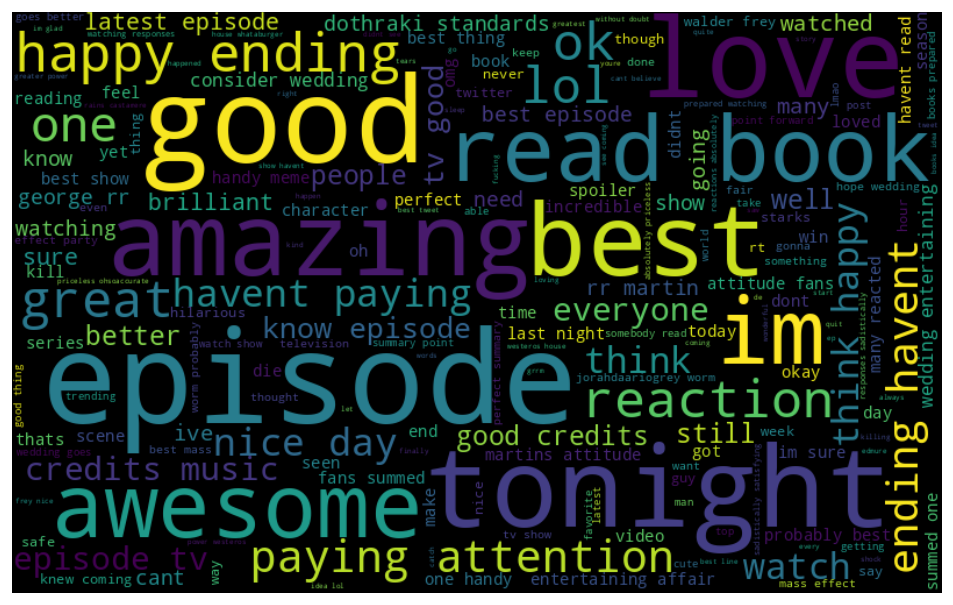

In [870]:

all_words = ' '.join([text for text in positive_df['processed']]) # I wanted to look positive words in positive dataset
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [871]:
Negative = data.loc[data['polarity'] <= -0.5] 

In [872]:
Negative # I saw 1832 tweets are negative.

id      created_at created_at_shift       from_user  \
10     3.41612e+17  6/3/2013 18:45                0         suppgab   
12     3.41612e+17  6/3/2013 18:45                0      LauraSxoxo   
31     3.41612e+17  6/3/2013 18:45                0       JustinCos   
44     3.41612e+17  6/3/2013 18:45                0      Hesiod2k11   
71     3.41612e+17  6/3/2013 18:45                0         Fara7_H   
...            ...             ...              ...             ...   
27181  3.41668e+17  6/3/2013 22:28                0          mikkyx   
27184  3.41668e+17  6/3/2013 22:28                0        Sersoker   
27185  3.41668e+17  6/3/2013 22:28                0     obrienbarry   
27284  3.41668e+17  6/3/2013 22:28                0  jackrjthompson   
27308  3.41668e+17  6/3/2013 22:28                0   BookishGirl92   

      from_user_id from_user_id_str   from_user_name       id_str  \
10        60284029         60284029     Gab Gonzalez  3.41612e+17   
12        45312927         45312927           Laura   3.41612e+17   
31       285336168        285336168              Coz  3.41612e+17   
44       264833204        264833204  Hesiod Theogeny  3.41612e+17   
71       308092022        308092022        Glen Coco  3.41612e+17   
...            ...              ...              ...          ...   
27181     25370016         25370016    Michael Price  3.41668e+17   
27184    184798052        184798052   Bryan Sersoker  3.41668e+17   
27185    101535178        101535178    Barry O'Brien  3.41668e+17   
27284    148829450        148829450    Jack Thompson  3.41668e+17   
27308    190694770        190694770         Michaela  3.41668e+17   

      in_reply_to_status_id in_reply_to_status_id_str iso_language_code  \
10                      nan                       nan                tl   
12                      nan                       nan                en   
31                      nan                       nan                en   
44                      nan                       nan                en   
71                      nan                       nan                en   
...                     ...                       ...               ...   
27181                   nan                       nan                en   
27184                   nan                       nan                es   
27185                   nan                       nan                en   
27284                   nan                       nan                en   
27308                   nan                       nan                en   

      latitude longitude            metadata place  \
10         nan       nan  result_type=recent   nan   
12         nan       nan  result_type=recent   nan   
31         nan       nan  result_type=recent   nan   
44         nan       nan  result_type=recent   nan   
71         nan       nan  result_type=recent   nan   
...        ...       ...                 ...   ...   
27181      nan       nan  result_type=recent   nan   
27184      nan       nan  result_type=recent   nan   
27185      nan       nan  result_type=recent   nan   
27284      nan       nan  result_type=recent   nan   
27308      nan       nan  result_type=recent   nan   

                                       profile_image_url  \
10     http://a0.twimg.com/profile_images/3728220392/...   
12     http://a0.twimg.com/profile_images/3660002363/...   
31     http://a0.twimg.com/profile_images/3459630270/...   
44     http://a0.twimg.com/profile_images/3165004758/...   
71     http://a0.twimg.com/profile_images/3572714321/...   
...                                                  ...   
27181  http://a0.twimg.com/profile_images/3609728608/...   
27184  http://a0.twimg.com/profile_images/3131207635/...   
27185  http://a0.twimg.com/profile_images/3430200721/...   
27284  http://a0.twimg.com/profile_images/3747580484/...   
27308  http://a0.twimg.com/profile_images/3363126626/...   

                                 profile_image_url_https       

In [873]:
# negative time line

In [874]:
Negative2=Negative[['created_at','processed']]
# I created time window 
Negative2['freq']=Negative2.groupby(by='created_at')['created_at'].transform('count')

/home/fmx2hx/.conda/envs/conda/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [875]:
Negative2['created_at'] = pd.to_datetime(Negative2['created_at'])
dataset_n = Negative2.set_index('created_at')
dataset_n.index

/home/fmx2hx/.conda/envs/conda/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


DatetimeIndex(['2013-06-03 18:45:00', '2013-06-03 18:45:00',
               '2013-06-03 18:45:00', '2013-06-03 18:45:00',
               '2013-06-03 18:45:00', '2013-06-03 18:44:00',
               '2013-06-03 18:44:00', '2013-06-03 18:43:00',
               '2013-06-03 18:39:00', '2013-06-03 18:45:00',
               ...
               '2013-06-03 22:27:00', '2013-06-03 22:28:00',
               '2013-06-03 22:28:00', '2013-06-03 22:28:00',
               '2013-06-03 22:28:00', '2013-06-03 22:28:00',
               '2013-06-03 22:28:00', '2013-06-03 22:28:00',
               '2013-06-03 22:28:00', '2013-06-03 22:28:00'],
              dtype='datetime64[ns]', name='created_at', length=1832, freq=None)

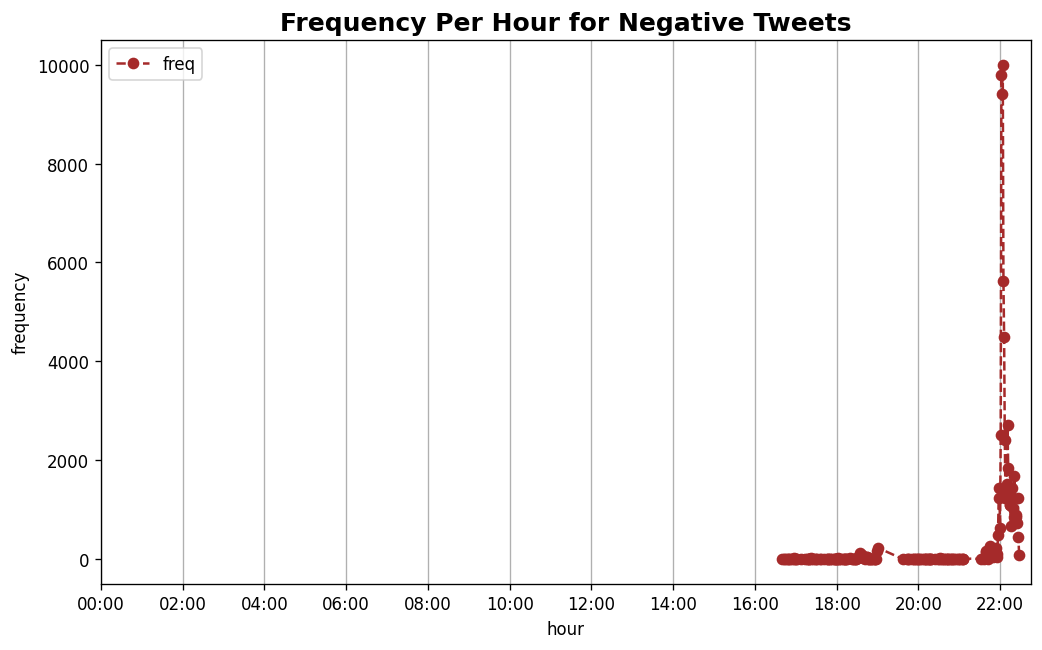

In [876]:
title_font= {"family" : "Cambria",
             "size" : 15,
             "color" : "black",
             "weight" : "bold"}

plt.rcParams.update({'figure.figsize': (10,6), 'figure.dpi': 120})

by_time = dataset_n.groupby(dataset_n.index.time).sum()
hourly_ticks = 2 * 60 * 60 *  np.arange(12)
by_time.plot(xticks=hourly_ticks, style='--o', color='brown')
plt.title('Frequency Per Hour for Negative Tweets', fontdict=title_font)
plt.xlabel('hour')
plt.ylabel('frequency')
plt.grid(axis='x')
plt.show();


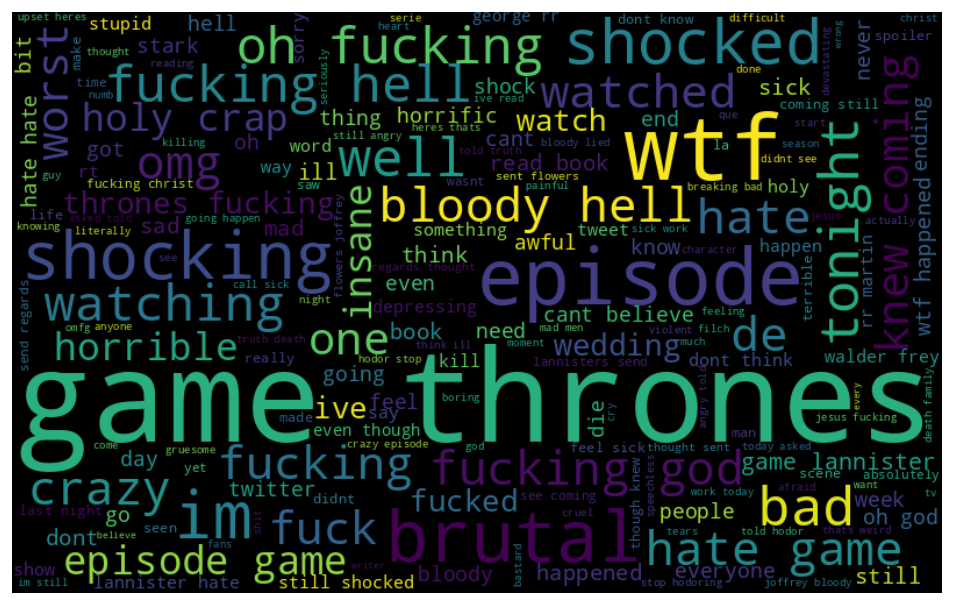

In [877]:

all_words = ' '.join([text for text in Negative['processed']]) ## I wanted to look negative words in negative dataset
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [878]:
Neutral = data.loc[(data['polarity'] >= -0.5) & (data['polarity'] <= 0.5)]

In [879]:

Neutral  # I saw that 25239 tweets are neutral

id      created_at created_at_shift       from_user  \
0      3.41612e+17  6/3/2013 18:45                0  TheMadamEditor   
1      3.41612e+17  6/3/2013 18:45                0      nitaselimi   
2      3.41612e+17  6/3/2013 18:45                0    dh_editorial   
3      3.41612e+17  6/3/2013 18:45                0        theprint   
4      3.41612e+17  6/3/2013 18:45                0      Mr_Twenty2   
...            ...             ...              ...             ...   
27330  3.41668e+17  6/3/2013 22:28                0  RocketQueen2x5   
27331  3.41668e+17  6/3/2013 22:28                0     Brianpmohan   
27332  3.41668e+17  6/3/2013 22:28                0   WestJamUnited   
27333  3.41668e+17  6/3/2013 22:28                0        PAHarper   
27334  3.41668e+17  6/3/2013 22:28                0    ShrimpWonder   

      from_user_id from_user_id_str       from_user_name       id_str  \
0        337689639        337689639         madam-editor  3.41612e+17   
1        421347539        421347539          Nita Selimi  3.41612e+17   
2        256671039        256671039  Dee @ EditorialEyes  3.41612e+17   
3           809334           809334     Rasmus Rasmussen  3.41612e+17   
4         69222052         69222052           Marty Caan  3.41612e+17   
...            ...              ...                  ...          ...   
27330    155242080        155242080         Funke Aleshe  3.41668e+17   
27331     51492815         51492815          Brian Mohan  3.41668e+17   
27332    334073484        334073484                Jamie  3.41668e+17   
27333    106702255        106702255          Phil Harper  3.41668e+17   
27334    365207282        365207282    boundarymembranes  3.41668e+17   

      in_reply_to_status_id in_reply_to_status_id_str iso_language_code  \
0                       nan                       nan                en   
1               3.41611e+17               3.41611e+17                tl   
2                       nan                       nan                en   
3                       nan                       nan                en   
4                       nan                       nan                en   
...                     ...                       ...               ...   
27330                   nan                       nan                en   
27331                   nan                       nan                en   
27332                   nan                       nan                en   
27333                   nan                       nan                en   
27334                   nan                       nan                en   

      latitude longitude            metadata place  \
0          nan       nan  result_type=recent   nan   
1          nan       nan  result_type=recent   nan   
2          nan       nan  result_type=recent   nan   
3          nan       nan  result_type=recent   nan   
4          nan       nan  result_type=recent   nan   
...        ...       ...                 ...   ...   
27330      nan       nan  result_type=recent   nan   
27331      nan       nan  result_type=recent   nan   
27332      nan       nan  result_type=recent   nan   
27333      nan       nan  result_type=recent   nan   
27334      nan       nan  result_type=recent   nan   

                                       profile_image_url  \
0      http://a0.twimg.com/profile_images/1448601184/...   
1      http://a0.twimg.com/profile_images/3570330661/...   
2      http://a0.twimg.com/profile_images/1252656506/...   
3      http://a0.twimg.com/profile_images/1469678734/...   
4      http://a0.twimg.com/profile_images/1492961144/...   
...                                                  ...   
27330  http://a0.twimg.com/profile_images/3653474295/...   
27331  http://a0.twimg.com/profile_images/3442035606/...   
27332  http://a0.twimg.com/profile_images/3741402554/...   
27333  http://a0.twimg.com/profile_images/1267004068/...   
27334  http://a0.twimg.com/profile_images/3672468820/...   

               

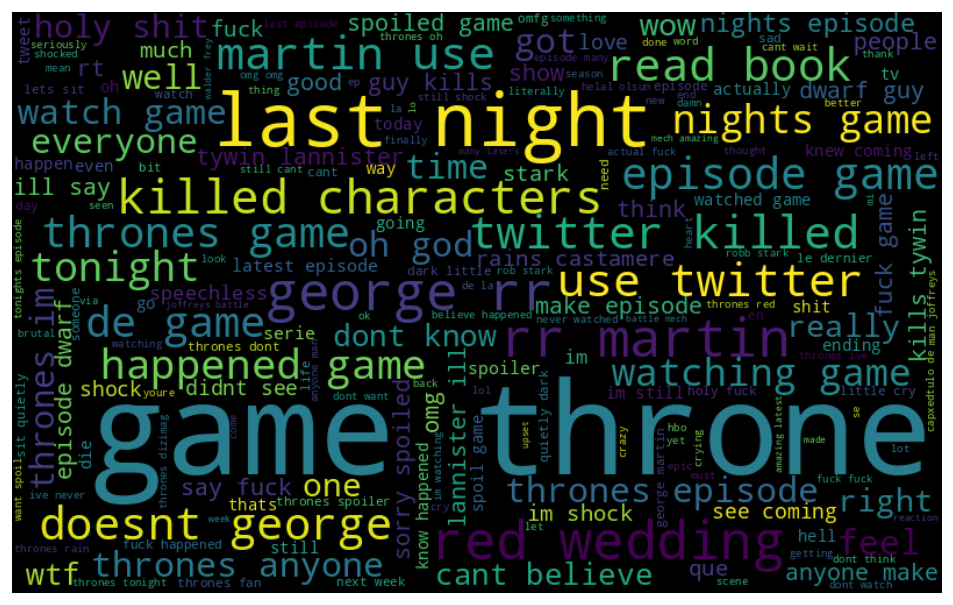

In [880]:
all_words = ' '.join([text for text in Neutral['processed']]) # I want to show words in neutral dataset tweets.
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()